# Income Group prediction

## Problem Description
The given data contains details of various markers and financial ratios of entities. Target variable is whether the company got bankrupt in the subsequent years or not. 1 – bankrupt, 0 - not bankrupt

## Anlaytics Objectives
Not defined

## Data Set Description
1.	Attr1	net profit / total assets 
2.	Attr2	total liabilities / total assets 
3.	Attr3	working capital / total assets 
4.	Attr4	current assets / short-term liabilities 
5.	Attr5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 
6.	Attr6	retained earnings / total assets 
7.	Attr7	EBIT / total assets 
8.	Attr8	book value of equity / total liabilities 
9.	Attr9	sales / total assets 
10.	Attr10	equity / total assets 
11.	Attr11	(gross profit + extraordinary items + financial expenses) / total assets 
12.	Attr12	gross profit / short-term liabilities 
13.	Attr13	(gross profit + depreciation) / sales 
14.	Attr14	(gross profit + interest) / total assets 
15.	Attr15	(total liabilities * 365) / (gross profit + depreciation) 
16.	Attr16	(gross profit + depreciation) / total liabilities 
17.	Attr17	total assets / total liabilities 
18.	Attr18	gross profit / total assets 
19.	Attr19	gross profit / sales 
20.	Attr20	(inventory * 365) / sales 
21.	Attr21	sales (n) / sales (n-1) 
22.	Attr22	profit on operating activities / total assets 
23.	Attr23	net profit / sales 
24.	Attr24	gross profit (in 3 years) / total assets 
25.	Attr25	(equity - share capital) / total assets 
26.	Attr26	(net profit + depreciation) / total liabilities 
27.	Attr27	profit on operating activities / financial expenses 
28.	Attr28	working capital / fixed assets 
29.	Attr29	logarithm of total assets 
30.	Attr30	(total liabilities - cash) / sales 
31.	Attr31	(gross profit + interest) / sales 
32.	Attr32	(current liabilities * 365) / cost of products sold 
33.	Attr33	operating expenses / short-term liabilities 
34.	Attr34	operating expenses / total liabilities 
35.	Attr35	profit on sales / total assets 
36.	Attr36	total sales / total assets 
37.	Attr37	(current assets - inventories) / long-term liabilities 
38.	Attr38	constant capital / total assets 
39.	Attr39	profit on sales / sales 
40.	Attr40	(current assets - inventory - receivables) / short-term liabilities 
41.	Attr41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
42.	Attr42	profit on operating activities / sales 
43.	Attr43	rotation receivables + inventory turnover in days 
44.	Attr44	(receivables * 365) / sales 
45.	Attr45	net profit / inventory 
46.	Attr46	(current assets - inventory) / short-term liabilities 
47.	Attr47	(inventory * 365) / cost of products sold 
48.	Attr48	EBITDA (profit on operating activities - depreciation) / total assets 
49.	Attr49	EBITDA (profit on operating activities - depreciation) / sales 
50.	Attr50	current assets / total liabilities 
51.	Attr51	short-term liabilities / total assets 
52.	Attr52	(short-term liabilities * 365) / cost of products sold) 
53.	Attr53	equity / fixed assets 
54.	Attr54	constant capital / fixed assets 
55.	Attr55	working capital 
56.	Attr56	(sales - cost of products sold) / sales 
57.	Attr57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 
58.	Attr58	total costs /total sales 
59.	Attr59	long-term liabilities / equity 
60.	Attr60	sales / inventory 
61.	Attr61	sales / receivables 
62.	Attr62	(short-term liabilities *365) / sales 
63.	Attr63	sales / short-term liabilities 
64.	Attr64	sales / fixed assets

## Considerations
1. While reading the data set replace the 'NA' as NAs

## Algorithm Class
Classification as we are predicting low or high income group, 0/1.

## Given constarints
1. Target variable is whether the company got bankrupt in the subsequent years or not.
2. 1 – bankrupt, 0 - not bankrupt
3. The target column name in your submission.csv should be "prediction".
4. Precision and Recall are auxiliary metrics for your information. F1 score will be considered for evaluation.


## Import libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
import warnings

from tqdm import tqdm
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random
from string import ascii_letters
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, recall_score,precision_score,precision_recall_curve,average_precision_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import roc_curve, auc,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score,f1_score
from sklearn.preprocessing import binarize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as impipe
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from fancyimpute import KNN



Using TensorFlow backend.


In [2]:
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
random.seed(777)

## Import required data


In [3]:
bankruptcyData=pd.read_csv("/Users/samyam/Documents/Samya/Insofe/insofe/CSE7305c_CUTe_ProblemDescription_and_Dataset/train.csv",na_values=["NA"])
print("The number of Rows in the Income Group data set  ="+str(bankruptcyData.shape[0]))
print("The number of Columns in the Income Group data set =" +str(bankruptcyData.shape[1]))


The number of Rows in the Income Group data set  =31283
The number of Columns in the Income Group data set =66


## Feature Analysis

__Columns names and check the datatypes of columns__

In [4]:
print("The columns in the data set are : \n",list(bankruptcyData.columns))

The columns in the data set are : 
 ['ID', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'target']


In [5]:
print("The data types of the columns are :\n\n",bankruptcyData.dtypes)

The data types of the columns are :

 ID          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
Attr31    float64
Attr32    float64
Attr33    float64
Attr34    float64
Attr35    float64
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53  

__Check the first and last 10 rows in dataset to get an understanding of data__

In [6]:
bankruptcyData.head()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,1,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,0.183310,0.56316,0.089220,0.167630,819.60,0.445340,2.21310,0.167630,0.074325,40.156,NaN,0.181150,0.060019,0.167630,0.511480,0.373930,11.55400,0.79756,3.5818,0.15579,0.079986,52.289,6.9805,4.598500,0.17756,2.25540,3.58820,0.64880,0.078728,0.355590,0.070139,0.080316,81.473,41.317,0.545540,1.21330,43.588,0.147550,0.065421,1.34840,0.297670,0.14326,1.40290,1.66060,1189.700,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,2,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,0.029484,0.03438,0.036362,0.007237,4087.60,0.089295,2.50890,0.007237,0.007394,58.670,0.97850,0.006018,0.005988,0.057817,0.547400,0.085842,0.27052,0.33402,5.6431,0.40721,0.007394,107.490,3.6924,1.950100,0.26400,0.97880,1.33380,0.78949,0.269720,0.104900,0.386540,0.006149,143.980,85.309,0.037254,1.19170,73.881,-0.022335,-0.022819,1.02410,0.210510,0.27083,1.01620,1.33400,1.939,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,3,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,0.138830,1.89830,0.236220,0.138360,363.85,1.003200,6.20450,0.138360,0.202140,38.625,1.83520,0.116690,0.161590,0.235380,0.834900,0.830940,249.30000,1.06860,4.1045,-0.16288,0.202830,46.263,7.8896,3.567900,0.10943,0.68447,5.58440,0.92467,0.159870,3.769300,0.038372,0.170480,147.760,109.140,1.527000,6.57730,45.975,0.093362,0.136400,3.42380,0.072886,0.12675,1.87160,2.06320,6092.300,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,4,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,0.079071,0.12581,0.030274,0.079071,5433.40,0.067177,0.71058,0.079071,0.025321,12.470,0.44909,0.137870,0.020466,-0.689290,-0.465480,0.056405,0.43483,-0.44339,4.6625,0.45003,0.025321,72.350,5.0450,0.097967,0.13787,3.50080,0.28998,0.31335,0.044150,0.007983,0.301740,0.044150,38.281,25.811,0.599050,0.35935,12.282,0.122400,0.039196,0.23629,0.628480,0.19822,-0.69738,0.46946,-13606.000,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,5,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,0.186110,0.51117,0.167100,0.131910,675.35,0.540460,1.51440,0.131910,0.061763,80.288,1.06000,0.182720,0.061656,0.208580,0.048201,0.540110,3.37080,1.46710,2.2343,0.30582,0.079012,49.562,7.3646,2.878100,0.23529,2.13570,0.57046,0.74195,0.110170,0.342630,0.053989,0.085555,104.400,24.108,0.280300,0.88928,90.228,-0.042243,-0.019780,1.05900,0.258050,0.13579,1.12950,2.46710,75.681,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


In [7]:
bankruptcyData.tail()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
31278,31279,0.267320,0.407240,0.407810,2.0014,54.282,0.267320,0.343780,1.36560,1.1866,0.55613,0.343780,0.84417,0.166160,0.343780,408.01,0.894600,2.4556,0.343780,0.156790,1.8796,NaN,0.341810,0.121920,0.343780,0.556130,0.706860,1.849800,2.20490,3.9685,0.092880,0.156790,80.441,4.5375,0.839340,0.341810,2.2083,NaN,0.55613,0.155890,0.79703,0.036950,0.155890,81.648,79.768,23.67600,1.97370,2.2303,0.321270,0.146530,2.0014,0.407240,0.220390,3.0069,3.0069,3792.700,0.157230,0.480690,0.84277,0.0,194.1900,4.5757,67.793,5.3840,11.8550,0
31279,31280,0.022768,0.031973,0.903510,29.2590,266.830,0.000000,0.030024,30.27700,1.1493,0.96803,0.030024,0.93905,0.030977,0.030024,327.80,1.113500,31.2770,0.030024,0.026124,23.6350,1.0192,0.029977,0.019810,0.027869,0.175830,0.886520,NaN,14.00400,1.8001,-0.550320,0.026124,10.503,34.7530,34.753000,0.038104,1.1493,NaN,0.96803,0.033155,21.08300,0.029976,0.026083,83.020,59.386,0.30594,26.93100,24.4450,0.024400,0.021230,29.2590,0.031973,0.028774,15.0040,15.0040,57.026,0.033169,0.023520,0.97386,0.0,15.4430,6.1462,10.154,35.9450,17.8140,0
31280,31281,0.100200,0.529230,0.091546,1.1998,-14.525,0.000000,0.100200,0.88953,2.7151,0.47077,0.143760,0.21875,0.053717,0.100200,1324.50,0.275580,1.8895,0.100200,0.036907,26.6700,1.0721,0.104430,0.036907,0.144800,0.089573,0.275580,2.397900,0.20327,3.9255,0.157410,0.043449,62.075,5.8800,5.089500,0.021533,2.7151,NaN,0.47077,0.007931,0.22235,0.117550,0.038465,60.197,33.527,0.50511,0.76677,26.8830,0.058796,0.021655,1.0385,0.458080,0.170070,1.0453,1.0453,771.140,0.007931,0.212850,0.96470,0.0,13.6860,10.8870,61.583,5.9270,6.0285,0
31281,31282,-0.079765,0.153710,0.694730,5.5198,63.382,-0.033106,-0.082183,5.18020,1.0052,0.79624,-0.082183,-0.53467,-0.008301,-0.082183,-4860.40,-0.075096,6.5059,-0.082183,-0.059098,121.3800,1.0201,-0.061474,-0.057360,-0.002624,0.796240,-0.059367,-0.444350,4.58360,4.4388,-0.062807,-0.059098,40.553,9.0007,-0.399940,-0.061474,1.4041,NaN,0.79624,-0.044206,1.57570,0.551300,-0.044206,159.120,37.743,-0.17249,2.51120,122.0100,-0.132110,-0.095004,5.5198,0.153710,0.111100,5.2534,5.2534,19080.000,0.005141,-0.100180,0.99486,0.0,3.0071,9.6707,40.344,9.0472,9.1750,0
31282,31283,0.021070,0.287240,0.649310,3.2605,85.325,0.517390,0.032398,2.05410,1.0030,0.59000,0.032398,0.11279,0.019507,0.032398,2997.60,0.121760,3.4814,0.032398,0.018070,1.9553,1.8864,0.006217,0.011752,0.634630,0.590000,0.082326,0.034776,10.23300,4.1788,-0.061209,0.018070,58.650,6.2234,0.021643,0.006217,1.8214,NaN,0.59000,0.003467,2.13620,1.073900,0.003467,65.742,63.787,2.19370,3.22710,1.9612,0.003639,0.002030,3.2605,0.287240,0.160680,9.2983,9.2983,9800.400,0.002979,0.035712,0.99702,0.0,186.6700,5.7222,58.475,6.2420,28.2560,0


__Check the summary of dataframe__

In [8]:
bankruptcyData.describe(include="all")

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,31283.000000,31276.000000,31276.000000,31276.000000,31181.000000,3.122000e+04,31276.000000,31276.000000,31210.000000,31279.000000,31276.000000,31251.000000,31181.000000,31182.000000,31276.000000,3.125800e+04,31209.000000,31210.000000,31276.000000,31181.000000,3.118200e+04,27032.000000,31276.000000,31182.000000,30603.000000,31276.000000,31209.000000,2.927900e+04,30682.000000,31276.000000,31182.000000,31182.000000,3.102400e+04,31181.000000,31210.000000,31276.000000,31276.000000,17515.000000,31276.000000,31182.000000,31181.000000,30744.000000,31182.000000,3.118200e+04,3.118200e+04,29717.000000,31181.000000,3.107600e+04,31275.000000,31182.000000,31210.000000,31276.000000,31071.000000,30682.000000,30682.000000,3.128300e+04,3.118200e+04,31277.000000,3.121500e+04,31277.000000,2.971300e+04,31210.000000,3.118200e+04,31181.000000,30682.000000,31283.000000
mean,15642.000000,0.051612,0.551159,0.151249,7.321993,-1.706215e+02,-0.011735,0.120577,14.379693,2.783840,0.704251,0.163179,1.260081,0.925212,0.120584,2.521810e+03,1.625026,15.567825,0.124156,0.275099,3.137176e+02,4.472551,0.143330,0.259348,0.300117,0.429459,1.441866,1.113871e+03,5.620112,3.999003,8.968725,0.295723,1.004881e+03,9.017719,5.754549,0.135787,3.026536,109.966990,0.803249,-0.354630,2.384533,10.240541,-0.125615,1.294116e+03,9.804048e+02,18.394885,6.441843,3.041197e+02,0.056038,-0.572813,6.978725,0.447673,5.232802,27.927665,28.751932,8.132508e+03,-3.637422e+01,-0.007774,4.067219e+01,1.677983,5.462892e+02,15.227988,1.640595e+03,9.656775,81.529420,0.048301
std,9030.768572,1.748230,4.510523,3.754494,347.736044,2.392279e+04,5.489446,6.045041,562.011982,69.973455,15.333687,5.517468,79.213843,96.748519,6.045041,9.390875e+04,80.545039,563.777604,6.061688,55.818460,4.423040e+04,264.381138,5.375502,55.525578,7.862806,11.779452,77.830748,3.143325e+04,148.141011,0.830576,943.826902,56.012806,1.021028e+05,136.302887,140.176709,5.030067,69.857432,3413.164811,15.438997,45.866508,65.108133,1647.212797,17.479572,1.725326e+05,1.284386e+05,2852.892189,347.690651,3.457378e+04,4.961887,52.667225,361.935045,3.748064,570.433320,1401.203446,1407.485957,7.840624e+04,6.276744e+03,13.989982,6.283661e+03,143.470467,3.792399e+04,219.335078,1.515043e+05,142.374215,2726.762529,0.214405
min,1.000000,-256.890000,-430.870000,-479.730000,-0.045319,-2.722100e+06,-508.120000,-517.480000,-15.236000,-3.496000,-479.730000,-189.450000,-6331.800000,-1317.600000,-517.480000,-5.611900e+06,-6331.800000,-0.013858,-517.480000,-1325.600000,-2.934000e+01,-1325.000000,-216.800000,-1325.600000,-314.370000,-500.750000,-6331.800000,-2.590100e+05,-3829.900000,-0.886060,-4940.000000,-1325.600000,-9.295600e+03,-7.234800,-1696.000000,-169.470000,-0.000857,-525.520000,-479.730000,-7522.000000,-101.270000,-1234.400000,-1395.800000,-1.158700e+05,-1.158700e+05,-256230.000000,-101.260000,-5.327200e+01,-218.420000,-9001.000000,-0.045239,0.000000,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-6.590300,-1.496500e+04,-0.367890,-3.726500,0.000000
25%,7821.500000,0.003360,0.269397,0.022146,1.051000,-4.845300e+01,0.000000,0.005758,0.428970,1.018100,0.294558,0.015313,0.014702,0.023881,0.005762,2.197650e+02,0.073787,1.448950,0.005762,0.003916,1.538300e+01,0.907272,0.000000,0.002276,0.020946,0.147102,0.066732,3.964150e-02,0.039663,3.489000,0.082535,0.006982,4.619000e+01,2.829700,0.312050,0.005647,1.101475,1.128950,0.418965,0.003907,0.052931,0.026327,0.000000,6.644225e+01,3.484425e+01,0.019089,0.610480,1.613400e+01,-0.039192,-0.0

__Distribution of data accross target variable__

In [9]:
bankruptcyData_target_0 = bankruptcyData[bankruptcyData['target']==0]
bankruptcyData_target_1 = bankruptcyData[bankruptcyData['target']==1]

In [10]:
bankruptcyData_target_0.describe(include='all')
bankruptcyData_target_1.describe(include='all')

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,29772.000000,29766.000000,29766.000000,29766.000000,29674.000000,2.970900e+04,29766.000000,29766.000000,29702.000000,29768.000000,29766.000000,29766.000000,29674.000000,29681.000000,29766.000000,2.974700e+04,29701.000000,29702.000000,29766.000000,29680.000000,2.968100e+04,25964.000000,29766.000000,29681.000000,29093.000000,29766.000000,29701.000000,2.829000e+04,29224.000000,29766.000000,29681.000000,29681.000000,2.952100e+04,29674.000000,29702.000000,29766.000000,29766.000000,16720.000000,29766.000000,29681.000000,29674.000000,29233.000000,29681.000000,2.968100e+04,2.968100e+04,28333.000000,29674.000000,2.956500e+04,29765.000000,29681.000000,29702.000000,29766.000000,29561.000000,29224.000000,29224.000000,2.977200e+04,2.968100e+04,29768.000000,2.971000e+04,29768.000000,2.832900e+04,29703.000000,2.968100e+04,29674.000000,29224.000000,29772.0
mean,15638.311098,0.057965,0.536855,0.160801,7.488379,-1.391474e+02,0.001487,0.129940,14.739196,2.826306,0.730161,0.172836,1.591841,0.948241,0.129947,2.447363e+03,1.912554,15.933740,0.133700,0.290524,3.257848e+02,4.610390,0.152173,0.274196,0.311810,0.455297,1.721970,1.151486e+03,5.709291,4.009098,9.065078,0.309484,8.903378e+02,8.900275,5.736571,0.145922,3.061354,113.453225,0.828944,-0.112903,2.389522,10.768178,-0.134120,1.348167e+03,1.022389e+03,18.972043,6.615909,3.152054e+02,0.063073,-0.578669,7.184072,0.438499,5.446024,26.195379,26.998058,8.473759e+03,-3.795647e+01,0.000623,4.267826e+01,1.727334,5.663782e+02,15.225650,1.700087e+03,9.653195,79.766145,0.0
std,9030.297481,1.788450,4.606443,3.844293,356.411470,2.371478e+04,5.597708,6.195341,575.600456,71.720876,15.706588,5.652320,71.819888,99.054366,6.195341,9.528317e+04,73.914145,577.411661,6.212403,57.206783,4.533491e+04,269.762800,5.508982,56.906521,8.032263,12.057686,70.793472,3.197333e+04,151.571049,0.828017,966.132792,57.403058,1.016612e+05,138.232163,143.430909,5.154948,71.600233,3492.900185,15.814631,17.431678,66.559319,1689.246508,17.890945,1.768408e+05,1.316457e+05,2921.512275,356.373724,3.544563e+04,5.084309,53.899231,370.984459,3.838123,584.812599,1342.983893,1349.215460,8.003879e+04,6.433350e+03,14.230309,6.440848e+03,147.036150,3.883520e+04,224.347412,1.552839e+05,145.240877,2692.069191,0.0
min,1.000000,-256.890000,-430.870000,-479.730000,-0.045319,-2.722100e+06,-508.120000,-517.480000,-15.236000,-1.215700,-479.730000,-189.450000,-1236.400000,-1317.600000,-517.480000,-5.611900e+06,-214.670000,-0.013858,-517.480000,-1325.600000,-2.934000e+01,-1325.000000,-216.800000,-1325.600000,-314.370000,-500.750000,-214.670000,-2.590100e+05,-3829.900000,-0.886060,-4940.000000,-1325.600000,-9.295600e+03,-7.234800,-1696.000000,-169.470000,-0.000857,-525.520000,-479.730000,-1395.800000,-101.270000,-1234.400000,-1395.800000,-1.158700e+05,-1.158700e+05,-256230.000000,-101.260000,-5.327200e+01,-218.420000,-9001.000000,-0.045239,0.000000,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-6.590300,-1.496500e+04,-0.367890,-3.726500,0.0
25%,7829.750000,0.004941,0.263893,0.030235,1.069850,-4.588600e+01,0.000000,0.007825,0.451333,1.020400,0.304782,0.018527,0.020495,0.026321,0.007831,2.371950e+02,0.082840,1.473500,0.007831,0.005151,1.545000e+01,0.911168,0.000000,0.003392,0.029407,0.158277,0.075360,6.537675e-02,0.054172,3.498900,0.079625,0.008706,4.567400e+01,2.871000,0.318820,0.007567,1.101800,1.134025,0.429890,0.005188,0.056072,0.027802,0.000000,6.661600e+01,3.514500e+01,0.027476,0.632340,1.631500e+01,-0.036167,-0.025055,0.791650,0.185743,

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,1511.000000,1510.000000,1510.000000,1510.000000,1507.000000,1.511000e+03,1510.000000,1510.000000,1508.000000,1511.000000,1510.000000,1485.000000,1507.000000,1501.000000,1510.000000,1.511000e+03,1508.000000,1508.000000,1510.000000,1501.000000,1501.000000,1068.000000,1510.000000,1501.000000,1510.000000,1510.000000,1508.000000,989.000000,1458.000000,1510.000000,1501.000000,1501.000000,1.503000e+03,1507.000000,1508.000000,1510.000000,1510.000000,795.000000,1510.000000,1501.000000,1507.000000,1511.000000,1501.000000,1501.000000,1501.000000,1384.000000,1507.000000,1511.000000,1510.000000,1501.000000,1508.000000,1510.000000,1510.000000,1458.000000,1458.000000,1511.000000,1501.000000,1509.000000,1505.000000,1509.000000,1384.000000,1507.000000,1501.000000,1507.000000,1458.000000,1511.0
mean,15714.684315,-0.073619,0.833137,-0.037045,4.045726,-7.894601e+02,-0.272357,-0.063989,7.298828,1.947223,0.193500,-0.030383,-5.272531,0.469823,-0.063989,3.987439e+03,-4.038017,8.360652,-0.063989,-0.029914,75.097362,1.121567,-0.030975,-0.034259,0.074819,-0.079874,-4.074967,37.924668,3.832616,3.800006,7.063434,0.023629,3.254671e+03,11.330280,6.108656,-0.063994,2.340184,36.646441,0.296733,-5.134589,2.286292,0.032450,0.042579,225.302328,150.205442,6.579415,3.014349,87.211187,-0.082627,-0.457012,2.934152,0.628519,1.058589,62.649438,63.906390,1408.679813,-5.086490,-0.173415,1.070658,0.704437,135.088990,15.274071,464.191770,9.727258,116.872336,1.0
std,9042.731149,0.485865,1.739289,0.780173,25.038799,2.769897e+04,2.531083,0.492154,106.532386,4.219026,2.586080,0.460268,168.039868,20.803537,0.492154,6.082783e+04,163.227145,106.551151,0.492154,3.598505,394.319296,2.196924,0.475125,3.596045,3.143677,2.784326,163.225187,2709.724844,36.584568,0.855801,220.047620,4.421694,1.104302e+05,90.273589,38.379107,0.433275,4.466572,252.404090,2.584744,194.150997,21.842752,5.149608,4.219458,1855.618848,1519.067733,165.518833,22.414207,935.045178,0.598363,13.336845,18.679992,0.739408,13.585958,2273.292873,2280.990127,31688.472873,194.155115,7.870601,1.118484,12.218405,2535.742945,65.416934,4881.201045,63.550661,3348.086240,0.0
min,50.000000,-9.743700,0.000000,-14.989000,0.000000,-1.076400e+06,-54.464000,-9.743700,-2.003200,-3.496000,-45.027000,-8.935200,-6331.800000,-36.219000,-9.743700,-6.023600e+05,-6331.800000,0.000000,-9.743700,-36.219000,0.000000,-0.005694,-9.736700,-36.219000,-9.553800,-54.624000,-6331.800000,-17235.000000,-226.520000,0.698970,-6.621800,-36.212000,0.000000e+00,0.002007,-38.524000,-8.430200,0.000000,-89.392000,-45.027000,-7522.000000,-0.335160,-151.010000,-14.325000,0.000000,0.000000,-1318.100000,-0.003010,0.000000,-13.147000,-515.270000,0.000000,0.000000,0.000000,-516.600000,-227.600000,-146580.000000,-7522.100000,-177.850000,0.000000,-111.980000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7646.500000,-0.117515,0.448605,-0.136758,0.760655,-8.957500e+01,-0.126357,-0.116453,0.136238,0.956625,0.120638,-0.092924,-0.217035,-0.055593,-0.116453,-1.465750e+03,-0.106932,1.145425,-0.116453,-0.086015,13.088000,0.798558,-0.085319,-0.085292,-0.126340,-0.057447,-0.104695,-3.081900,-0.294020,3.263375,0.170950,-0.076041,6.136750e+01,2.195250,0.158833,-0.116975,1.096350,1.060100,0.219243,-0.093425,0.022968,-0.120020,-0.067527,62.689000,29.207000,-0.634968,0.295755,12.054500,-0.132302,-0.101530,0.541208,0.309827,0.162340,0.293513,0.570820,-928.000000,-0.063849,-0.137320,0.917960,0.000000,4.605850,4.549950,59.853000,2.067750,2.035700,1.0
50%,16175.000000,0.003342,0.666150,0.048582,1.095600,-3.541400e+01,0.000000,0.005

__Distribution of target attribute__

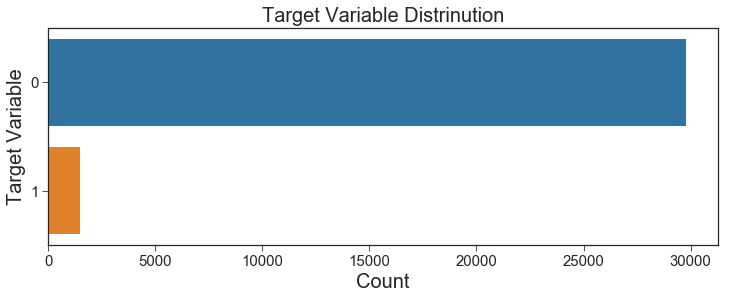

In [11]:
plt.figure(figsize=(12,4))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="target", data=bankruptcyData, order = bankruptcyData['target'].value_counts().index);
plot_1.axes.set_title("Target Variable Distrinution",fontsize=20);
plot_1.set_xlabel("Count",fontsize=20);
plot_1.set_ylabel("Target Variable",fontsize=20);
plot_1.tick_params(labelsize=15);
plt.show();


__Check count of null in each column & its percent__

In [12]:
pd.DataFrame({'total_missing': bankruptcyData.isnull().sum(), 
              'perc_missing': (bankruptcyData.isnull().sum()/bankruptcyData.shape[0])*100})

,total_missing,perc_missing
ID,0,0.000000
Attr1,7,0.022376
Attr2,7,0.022376
Attr3,7,0.022376
Attr4,102,0.326056
Attr5,63,0.201387
Attr6,7,0.022376
Attr7,7,0.022376
Attr8,73,0.233354
Attr9,4,0.012786


__Check for monotonically incraesing columns__

In [13]:
for col in bankruptcyData.columns :
    if(bankruptcyData[col].is_monotonic) :
        print("Column :", col, ": is Monotonically increasing")

Column : ID : is Monotonically increasing


__Drop attributes that are monotonically increasing or having many nulls__

In [14]:
bankruptcyData_1 = bankruptcyData.drop(['ID', 'Attr37'], axis=1)
bankruptcyData_1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,0.183310,0.56316,0.089220,0.167630,819.60,0.445340,2.21310,0.167630,0.074325,40.156,NaN,0.181150,0.060019,0.167630,0.511480,0.373930,11.55400,0.79756,3.5818,0.15579,0.079986,52.289,6.9805,4.598500,0.17756,2.25540,0.64880,0.078728,0.355590,0.070139,0.080316,81.473,41.317,0.545540,1.21330,43.588,0.147550,0.065421,1.34840,0.297670,0.14326,1.40290,1.66060,1189.700,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,0.029484,0.03438,0.036362,0.007237,4087.60,0.089295,2.50890,0.007237,0.007394,58.670,0.97850,0.006018,0.005988,0.057817,0.547400,0.085842,0.27052,0.33402,5.6431,0.40721,0.007394,107.490,3.6924,1.950100,0.26400,0.97880,0.78949,0.269720,0.104900,0.386540,0.006149,143.980,85.309,0.037254,1.19170,73.881,-0.022335,-0.022819,1.02410,0.210510,0.27083,1.01620,1.33400,1.939,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,0.138830,1.89830,0.236220,0.138360,363.85,1.003200,6.20450,0.138360,0.202140,38.625,1.83520,0.116690,0.161590,0.235380,0.834900,0.830940,249.30000,1.06860,4.1045,-0.16288,0.202830,46.263,7.8896,3.567900,0.10943,0.68447,0.92467,0.159870,3.769300,0.038372,0.170480,147.760,109.140,1.527000,6.57730,45.975,0.093362,0.136400,3.42380,0.072886,0.12675,1.87160,2.06320,6092.300,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,0.079071,0.12581,0.030274,0.079071,5433.40,0.067177,0.71058,0.079071,0.025321,12.470,0.44909,0.137870,0.020466,-0.689290,-0.465480,0.056405,0.43483,-0.44339,4.6625,0.45003,0.025321,72.350,5.0450,0.097967,0.13787,3.50080,0.31335,0.044150,0.007983,0.301740,0.044150,38.281,25.811,0.599050,0.35935,12.282,0.122400,0.039196,0.23629,0.628480,0.19822,-0.69738,0.46946,-13606.000,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,0.186110,0.51117,0.167100,0.131910,675.35,0.540460,1.51440,0.131910,0.061763,80.288,1.06000,0.182720,0.061656,0.208580,0.048201,0.540110,3.37080,1.46710,2.2343,0.30582,0.079012,49.562,7.3646,2.878100,0.23529,2.13570,0.74195,0.110170,0.342630,0.053989,0.085555,104.400,24.108,0.280300,0.88928,90.228,-0.042243,-0.019780,1.05900,0.258050,0.13579,1.12950,2.46710,75.681,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


__Check for count of unique values in different attriutes__

In [15]:
pd.DataFrame((bankruptcyData_1.nunique()/bankruptcyData_1.shape[0])*100)

,0
Attr1,89.361634
Attr2,85.257168
Attr3,88.910910
Attr4,75.485088
Attr5,94.150177
Attr6,56.001662
Attr7,89.281719
Attr8,88.220439
Attr9,61.886648
Attr10,85.461752


__Correlation between attributes__

In [16]:
corr = bankruptcyData_1.corr()
corr_uns = corr.unstack()
corr_uns_sort = pd.DataFrame(corr_uns.sort_values(ascending=False, kind="quicksort")).reset_index().rename({
    'level_0':'col_1', 'level_1':'col_2', 0:'corr'}, axis='columns')


#get all correlations that are not between same variables and also not NA's
corr_uns_sort_1 = corr_uns_sort[corr_uns_sort['col_1'] != corr_uns_sort['col_2']]
corr_uns_sort_2 = corr_uns_sort_1.dropna()
corr_uns_sort_3 = corr_uns_sort_2.sort_values(by=['corr'], ascending=False)
#Select correlations more than .50
corr_uns_sort_4 = corr_uns_sort_3.loc[(corr_uns_sort_3['corr'] >= 0.50) | (corr_uns_sort_3['corr'] <= -0.50)]
#Remove duplicates
corr_uns_sort_5 = corr_uns_sort_4.groupby(['corr']).head(1).reset_index(drop=True)
corr_uns_sort_5

,col_1,col_2,corr
0,Attr7,Attr14,1.000000
1,Attr46,Attr4,0.999950
2,Attr58,Attr20,0.999927
3,Attr43,Attr44,0.999730
4,Attr17,Attr8,0.999539
5,Attr31,Attr19,0.999459
6,Attr23,Attr19,0.999428
7,Attr53,Attr54,0.999305
8,Attr23,Attr31,0.998902
9,Attr10,Attr38,0.998791


__Distribution of differnt variables__

(31283, 64)


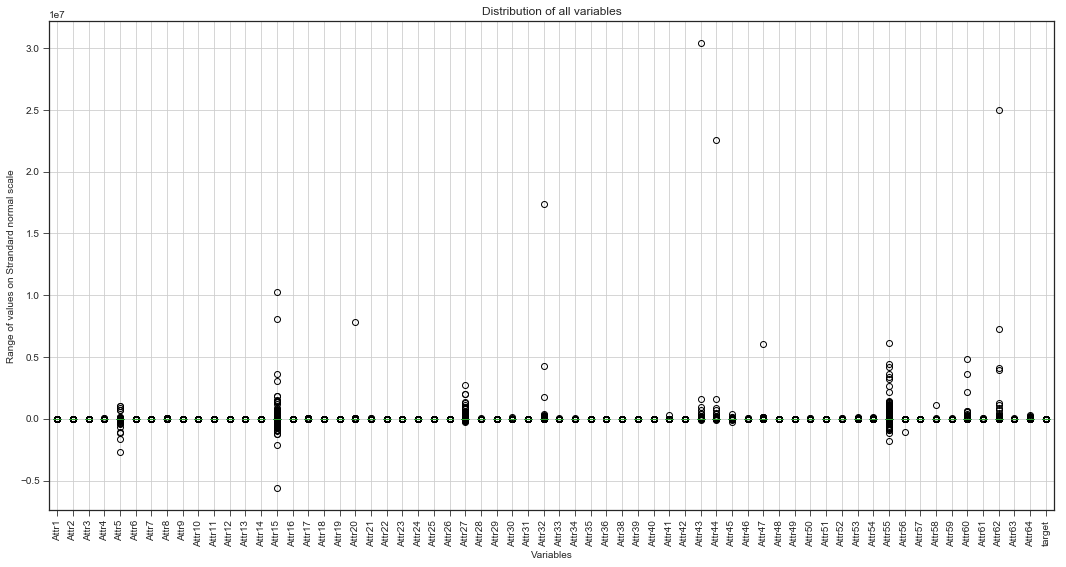

In [17]:
plt.figure(figsize=(18,9));
plt.title("Distribution of all variables");
plt.ylabel("Range of values on Strandard normal scale")
plt.xlabel("Variables")
print(bankruptcyData_1.shape)
bankruptcyData_1.boxplot(rot=90);


__Outlier Detection__

__1. Using individual columns__

In [18]:
bankruptcyData_target_0 = bankruptcyData_1[bankruptcyData_1['target']==0]
bankruptcyData_target_1 = bankruptcyData_1[bankruptcyData_1['target']==1]

(29015, 64)


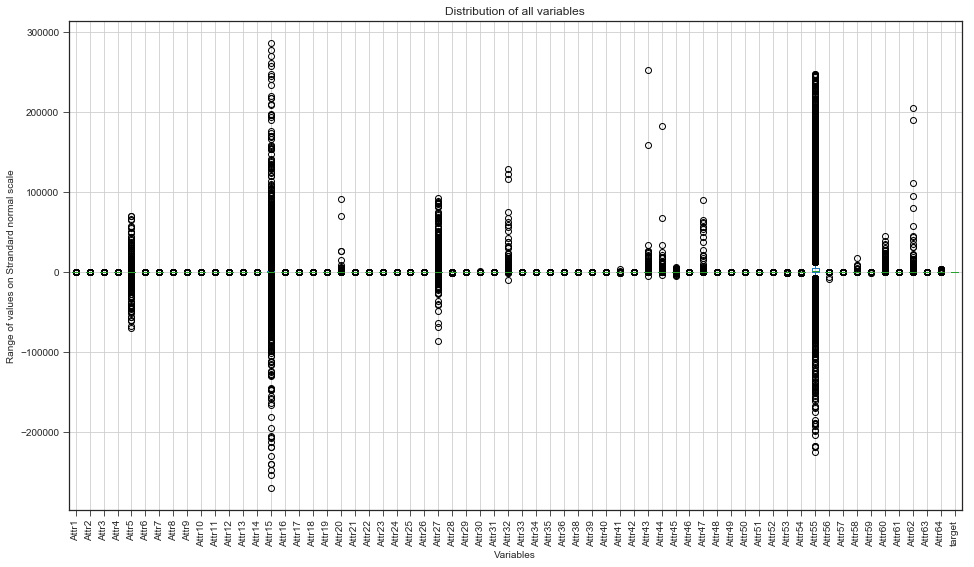

In [19]:
# np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5 ---> True: all datapoints having value beyound 5 sigma
# (np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1) --> True: Atleast one of the column in the row has a value beyong 5 sigma
# ~((np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1))] --> Select the rows with no value beyond 5 sigma

#This way we preserve the NAN

bankruptcyData_target_0_1 = bankruptcyData_target_0[~((np.abs(((bankruptcyData_target_0 - bankruptcyData_target_0.mean())/bankruptcyData_target_0.std())) >3).any(1))]
plt.figure(figsize=(16,9));
plt.title("Distribution of all variables");
plt.ylabel("Range of values on Strandard normal scale")
plt.xlabel("Variables")
print(bankruptcyData_target_0_1.shape)
bankruptcyData_target_0_1.boxplot(rot=90);



(1361, 64)


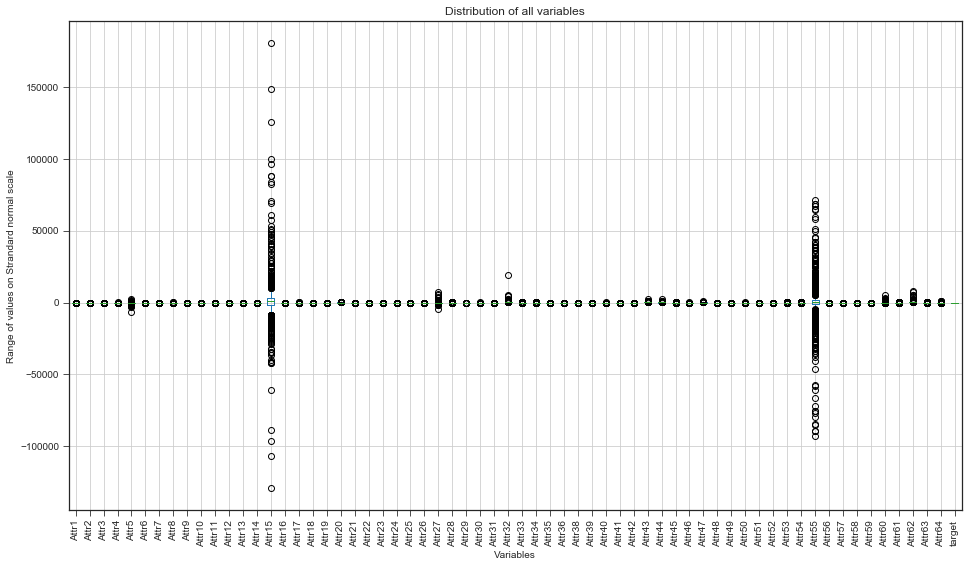

In [20]:
# np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5 ---> True: all datapoints having value beyound 5 sigma
# (np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1) --> True: Atleast one of the column in the row has a value beyong 5 sigma
# ~((np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1))] --> Select the rows with no value beyond 5 sigma

#This way we preserve the NAN

bankruptcyData_target_1_1 = bankruptcyData_target_1[~((np.abs(((bankruptcyData_target_1 - bankruptcyData_target_1.mean())/bankruptcyData_target_1.std())) >3).any(1))]
plt.figure(figsize=(16,9));
plt.title("Distribution of all variables");
plt.ylabel("Range of values on Strandard normal scale")
plt.xlabel("Variables")
print(bankruptcyData_target_1_1.shape)
bankruptcyData_target_1_1.boxplot(rot=90);



In [21]:
bankruptcyData_2 = bankruptcyData_target_0_1.append(bankruptcyData_target_1_1, ignore_index=True)
bankruptcyData_2.shape

(30376, 64)

__Distribution of target attribute__

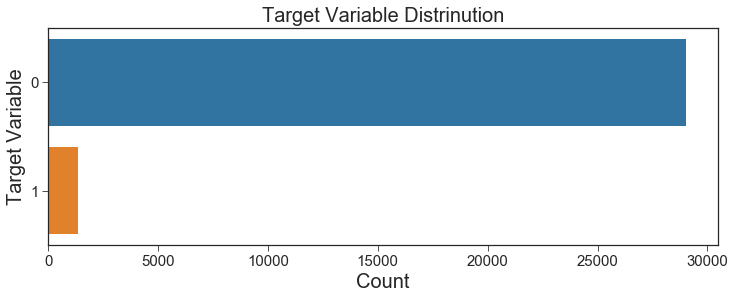

In [22]:
plt.figure(figsize=(12,4))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="target", data=bankruptcyData_2, order = bankruptcyData_2['target'].value_counts().index);
plot_1.axes.set_title("Target Variable Distrinution",fontsize=20);
plot_1.set_xlabel("Count",fontsize=20);
plot_1.set_ylabel("Target Variable",fontsize=20);
plot_1.tick_params(labelsize=15);
plt.show();


__2. Using Clustering__

__Decide on the number of clusters based on silhouette_score__

In [23]:
bankruptcyData_2_target_0 = bankruptcyData_2[bankruptcyData_2['target']==0]
bankruptcyData_2_target_1 = bankruptcyData_2[bankruptcyData_2['target']==1]

In [24]:
#For target==0
bankruptcyData_2_target_0_knn = bankruptcyData_2_target_0.drop('target', axis=1).fillna(bankruptcyData_2_target_0.mean())
scaler = StandardScaler()
bankruptcyData_2_target_0_knn_1 = scaler.fit_transform(bankruptcyData_2_target_0_knn)
bankruptcyData_2_target_0_knn_2 = pd.DataFrame(bankruptcyData_2_target_0_knn_1, 
                                      index=bankruptcyData_2_target_0_knn.index, 
                                      columns=bankruptcyData_2_target_0_knn.columns)
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(bankruptcyData_2_target_0_knn_2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(bankruptcyData_2_target_0_knn_2.values, preds, metric='euclidean')
    print ("For n_clusters =" ,n_clusters, ", silhouette score is =",score)

    

For n_clusters = 2 , silhouette score is = 0.24011986436007915
For n_clusters = 3 , silhouette score is = 0.2515996163889104
For n_clusters = 4 , silhouette score is = 0.17390424717252356
For n_clusters = 5 , silhouette score is = 0.2833068645415797
For n_clusters = 6 , silhouette score is = 0.2876019624676196
For n_clusters = 7 , silhouette score is = 0.29205273360696854
For n_clusters = 8 , silhouette score is = 0.2899838341351539
For n_clusters = 9 , silhouette score is = 0.2567281285755956


__So 2 Clusters does the best segregation of data with target=0__

In [25]:
kMeansModel = KMeans(n_clusters=2, max_iter=300)
kMeansModel.fit(bankruptcyData_2_target_0_knn_2)

cluster_map = pd.DataFrame()
cluster_map = bankruptcyData_2_target_0_knn_2
cluster_map['cluster'] = kMeansModel.labels_
cluster_map.head()
cluster_map['cluster'].value_counts()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,cluster
0,0.356101,-0.139250,0.293921,-0.110918,0.003622,0.354939,0.420530,-0.142837,0.388174,0.173674,0.409703,-0.003776,0.002429,0.420530,-0.057502,-0.102674,-0.148133,0.420530,0.043123,-0.026232,6.972998e-16,0.474227,0.040289,-0.099031,0.339295,-0.108682,-0.065177,-0.117947,-0.544962,-0.040425,0.038400,-0.066582,-0.019479,0.051096,0.449063,0.189041,0.217070,0.076118,-0.140708,-0.025848,0.067909,-0.037148,-0.040057,-0.035180,-0.119218,-0.037849,0.401400,0.088311,-0.127325,-0.281213,-0.069341,-0.107862,-0.117331,-0.201414,0.008413,0.065451,-0.014500,-0.023337,-0.075952,-0.095218,-0.048568,-0.035926,-0.129803,0
1,-0.323575,-0.271538,-0.010493,-0.121899,0.003337,-0.039193,-0.368395,-0.122224,-0.531690,0.301226,-0.343445,-0.152381,-0.040957,-0.368395,0.196150,-0.220497,-0.127617,-0.368395,-0.024332,-0.000870,-3.551432e-02,-0.437136,-0.014890,-0.355169,0.411128,-0.210265,-0.068663,-0.144531,2.088250,-0.013981,-0.036102,-0.034150,-0.289721,-0.208754,0.876966,-0.655085,0.600182,0.362920,-0.191820,-0.015945,-0.034345,-0.002990,-0.003968,-0.040469,-0.121611,-0.011557,-0.131225,0.000995,-0.162033,-0.535364,-0.042276,-0.130277,-0.136834,-0.253605,0.011585,-0.099951,-0.015415,-0.002026,-0.079495,-0.289339,-0.033885,-0.259388,-0.164696,0
2,0.226105,-0.861108,0.740950,0.451297,0.113861,-0.039193,0.276559,0.135307,-0.743772,0.869690,0.191924,0.371443,0.123089,0.276559,-0.092875,0.081935,0.128701,0.276559,0.171938,-0.028329,9.900296e-02,0.138786,0.144018,0.058995,0.986070,0.052463,0.008274,-0.102404,0.122762,-0.073944,0.164476,-0.070123,0.055238,-0.050022,0.111800,-0.849704,0.968289,0.197965,0.555292,-0.026842,0.192217,-0.000924,0.015581,-0.024967,0.475104,-0.035778,0.231510,0.158546,0.094794,-0.936664,-0.072844,-0.080693,-0.093289,0.014010,0.009761,-0.011641,-0.015316,-0.036756,-0.075507,-0.329146,-0.053072,0.102550,-0.165770,0
3,-0.018924,2.233461,-1.329327,-0.265389,-0.020941,-1.717922,-0.015066,-0.250422,-0.527295,-2.253405,-0.100662,-0.126686,-0.045954,-0.015066,0.300606,-0.227817,-0.252345,-0.015066,-0.006265,-0.064158,-1.186412e-01,0.249004,-0.000104,-2.097788,-1.614427,-0.220644,-0.068612,-0.189115,0.835580,-0.009477,-0.017704,-0.054796,-0.178554,-0.390479,0.252586,1.012537,-0.696390,0.024195,-0.211580,-0.018599,0.018047,-0.060751,-0.052777,-0.034623,-0.213834,-0.065021,0.322550,0.062360,-0.246348,0.683401,-0.057681,-0.229607,-0.188460,-0.851548,0.006852,-0.191912,-0.013884,-0.329878,-0.051024,0.130907,-0.036326,-0.235029,-0.139072,0
4,0.336735,0.378428,0.640147,-0.043452,-0.011080,-0.509458,0.244834,-0.191523,0.301923,-0.325472,0.423412,-0.018387,0.066354,0.244834,-0.068698,-0.071196,-0.196593,0.244834,0.030462,0.028744,-2.271736e-02,0.482397,0.041961,-0.003515,-0.587169,-0.050086,-0.067705,-0.079550,-2.266328,-0.024645,0.037400,-0.068185,0.012089,-0.117703,0.734843,0.109892,0.470726,0.123333,-0.143351,-0.026353,0.075132,-0.024619,-0.054174,-0.037940,-0.155118,0.002632,-0.193640,0.004002,-0.158298,-0.396741,-0.070926,-0.123710,-0.069170,-0.250365,0.008935,0.159682,-0.014411,0.141848,-0.081564,0.173475,-0.050539,0.017465,-0.118545,0


0    29013
1        2
Name: cluster, dtype: int64

In [26]:
# So based on abve analysis we can remove rows belonging to cluster 1, 2
bankruptcyData_2_tar_0 = bankruptcyData_2.ix[bankruptcyData_2_target_0_knn_2.loc[bankruptcyData_2_target_0_knn_2['cluster'] == 0].index]
bankruptcyData_2_tar_0.head()
bankruptcyData_2_tar_0.shape


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,0.183310,0.56316,0.089220,0.167630,819.60,0.445340,2.21310,0.167630,0.074325,40.156,NaN,0.181150,0.060019,0.167630,0.511480,0.373930,11.55400,0.79756,3.5818,0.15579,0.079986,52.289,6.9805,4.598500,0.17756,2.25540,0.64880,0.078728,0.355590,0.070139,0.080316,81.473,41.317,0.545540,1.21330,43.588,0.147550,0.065421,1.34840,0.297670,0.14326,1.40290,1.66060,1189.700,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,0.029484,0.03438,0.036362,0.007237,4087.60,0.089295,2.50890,0.007237,0.007394,58.670,0.97850,0.006018,0.005988,0.057817,0.547400,0.085842,0.27052,0.33402,5.6431,0.40721,0.007394,107.490,3.6924,1.950100,0.26400,0.97880,0.78949,0.269720,0.104900,0.386540,0.006149,143.980,85.309,0.037254,1.19170,73.881,-0.022335,-0.022819,1.02410,0.210510,0.27083,1.01620,1.33400,1.939,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,0.138830,1.89830,0.236220,0.138360,363.85,1.003200,6.20450,0.138360,0.202140,38.625,1.83520,0.116690,0.161590,0.235380,0.834900,0.830940,249.30000,1.06860,4.1045,-0.16288,0.202830,46.263,7.8896,3.567900,0.10943,0.68447,0.92467,0.159870,3.769300,0.038372,0.170480,147.760,109.140,1.527000,6.57730,45.975,0.093362,0.136400,3.42380,0.072886,0.12675,1.87160,2.06320,6092.300,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,0.079071,0.12581,0.030274,0.079071,5433.40,0.067177,0.71058,0.079071,0.025321,12.470,0.44909,0.137870,0.020466,-0.689290,-0.465480,0.056405,0.43483,-0.44339,4.6625,0.45003,0.025321,72.350,5.0450,0.097967,0.13787,3.50080,0.31335,0.044150,0.007983,0.301740,0.044150,38.281,25.811,0.599050,0.35935,12.282,0.122400,0.039196,0.23629,0.628480,0.19822,-0.69738,0.46946,-13606.000,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,0.186110,0.51117,0.167100,0.131910,675.35,0.540460,1.51440,0.131910,0.061763,80.288,1.06000,0.182720,0.061656,0.208580,0.048201,0.540110,3.37080,1.46710,2.2343,0.30582,0.079012,49.562,7.3646,2.878100,0.23529,2.13570,0.74195,0.110170,0.342630,0.053989,0.085555,104.400,24.108,0.280300,0.88928,90.228,-0.042243,-0.019780,1.05900,0.258050,0.13579,1.12950,2.46710,75.681,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


(29013, 64)

In [27]:
#For target==1
bankruptcyData_2_target_1_knn = bankruptcyData_2_target_1.drop('target', axis=1).fillna(bankruptcyData_2_target_1.mean())
scaler = StandardScaler()
bankruptcyData_2_target_1_knn_1 = scaler.fit_transform(bankruptcyData_2_target_1_knn)
bankruptcyData_2_target_1_knn_2 = pd.DataFrame(bankruptcyData_2_target_1_knn_1, 
                                      index=bankruptcyData_2_target_1_knn.index, 
                                      columns=bankruptcyData_2_target_1_knn.columns)
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(bankruptcyData_2_target_1_knn_2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(bankruptcyData_2_target_1_knn_2.values, preds, metric='euclidean')
    print ("For n_clusters =" ,n_clusters, ", silhouette score is =",score)


For n_clusters = 2 , silhouette score is = 0.34903178924534617
For n_clusters = 3 , silhouette score is = 0.3716152273425758
For n_clusters = 4 , silhouette score is = 0.34835743382993584
For n_clusters = 5 , silhouette score is = 0.22258206438659311
For n_clusters = 6 , silhouette score is = 0.20035840264421498
For n_clusters = 7 , silhouette score is = 0.15200526960158633
For n_clusters = 8 , silhouette score is = 0.18611243969642807
For n_clusters = 9 , silhouette score is = 0.16465752867177666


__The datapoints for target=1, cannot be clustered__

__Merge the target 0 & 1__

In [28]:
bankruptcyData_3 = bankruptcyData_2_tar_0.append(bankruptcyData_2_target_1, ignore_index=True)
bankruptcyData_3.shape
bankruptcyData_3.head()

(30374, 64)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,0.183310,0.56316,0.089220,0.167630,819.60,0.445340,2.21310,0.167630,0.074325,40.156,NaN,0.181150,0.060019,0.167630,0.511480,0.373930,11.55400,0.79756,3.5818,0.15579,0.079986,52.289,6.9805,4.598500,0.17756,2.25540,0.64880,0.078728,0.355590,0.070139,0.080316,81.473,41.317,0.545540,1.21330,43.588,0.147550,0.065421,1.34840,0.297670,0.14326,1.40290,1.66060,1189.700,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,0.029484,0.03438,0.036362,0.007237,4087.60,0.089295,2.50890,0.007237,0.007394,58.670,0.97850,0.006018,0.005988,0.057817,0.547400,0.085842,0.27052,0.33402,5.6431,0.40721,0.007394,107.490,3.6924,1.950100,0.26400,0.97880,0.78949,0.269720,0.104900,0.386540,0.006149,143.980,85.309,0.037254,1.19170,73.881,-0.022335,-0.022819,1.02410,0.210510,0.27083,1.01620,1.33400,1.939,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,0.138830,1.89830,0.236220,0.138360,363.85,1.003200,6.20450,0.138360,0.202140,38.625,1.83520,0.116690,0.161590,0.235380,0.834900,0.830940,249.30000,1.06860,4.1045,-0.16288,0.202830,46.263,7.8896,3.567900,0.10943,0.68447,0.92467,0.159870,3.769300,0.038372,0.170480,147.760,109.140,1.527000,6.57730,45.975,0.093362,0.136400,3.42380,0.072886,0.12675,1.87160,2.06320,6092.300,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,0.079071,0.12581,0.030274,0.079071,5433.40,0.067177,0.71058,0.079071,0.025321,12.470,0.44909,0.137870,0.020466,-0.689290,-0.465480,0.056405,0.43483,-0.44339,4.6625,0.45003,0.025321,72.350,5.0450,0.097967,0.13787,3.50080,0.31335,0.044150,0.007983,0.301740,0.044150,38.281,25.811,0.599050,0.35935,12.282,0.122400,0.039196,0.23629,0.628480,0.19822,-0.69738,0.46946,-13606.000,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,0.186110,0.51117,0.167100,0.131910,675.35,0.540460,1.51440,0.131910,0.061763,80.288,1.06000,0.182720,0.061656,0.208580,0.048201,0.540110,3.37080,1.46710,2.2343,0.30582,0.079012,49.562,7.3646,2.878100,0.23529,2.13570,0.74195,0.110170,0.342630,0.053989,0.085555,104.400,24.108,0.280300,0.88928,90.228,-0.042243,-0.019780,1.05900,0.258050,0.13579,1.12950,2.46710,75.681,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


(30374, 64)


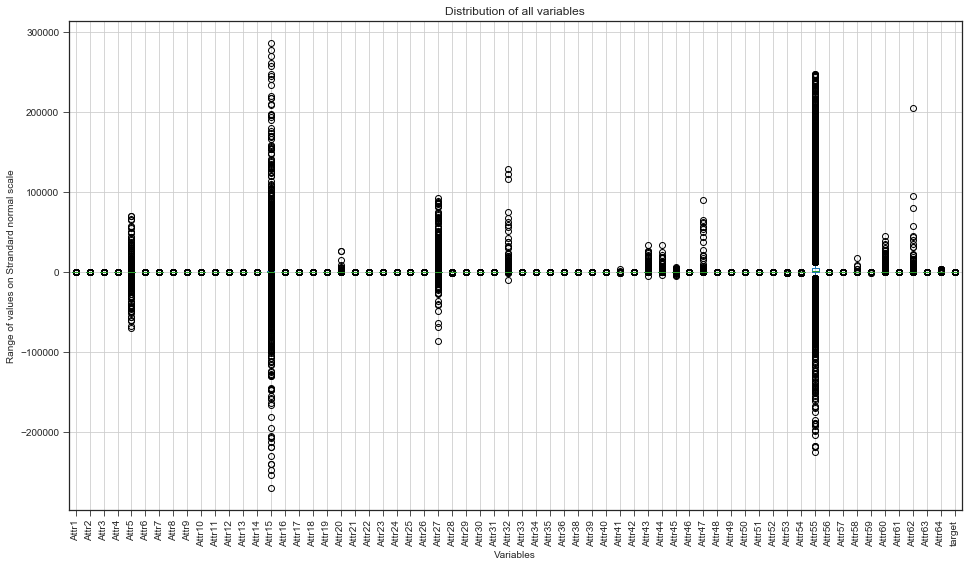

In [29]:
plt.figure(figsize=(16,9));
plt.title("Distribution of all variables");
plt.ylabel("Range of values on Strandard normal scale")
plt.xlabel("Variables")
print(bankruptcyData_3.shape)
bankruptcyData_3.boxplot(rot=90);

__Distribution of target attribute__

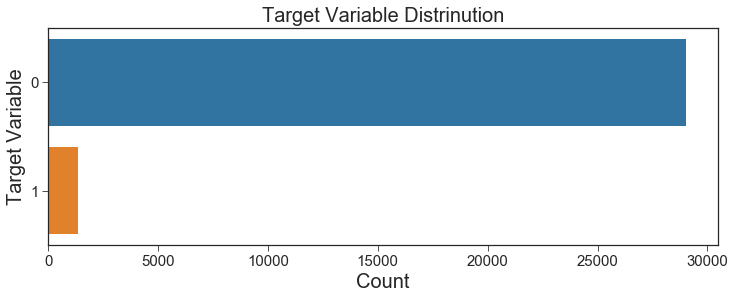

In [30]:
plt.figure(figsize=(12,4))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="target", data=bankruptcyData_3, order = bankruptcyData_3['target'].value_counts().index);
plot_1.axes.set_title("Target Variable Distrinution",fontsize=20);
plot_1.set_xlabel("Count",fontsize=20);
plot_1.set_ylabel("Target Variable",fontsize=20);
plot_1.tick_params(labelsize=15);
plt.show();


__Get Number of missing values in each row__

In [31]:
bankruptcyData_3_missing_row = pd.DataFrame(bankruptcyData_3.isna().sum(axis=1)).rename({0:"count_of_null"}, axis=1).sort_values(
    by='count_of_null', ascending=False).assign(
    count_of_null_percent=lambda row:(row.count_of_null/bankruptcyData_3.shape[1])*100)
bankruptcyData_3_missing_row.head()


,count_of_null,count_of_null_percent
18127,39,60.9375
4126,34,53.1250
12074,32,50.0000
462,32,50.0000
25379,31,48.4375


__Drop rows with more than 40% missing values__

In [32]:
#We can see there are many rows with more than 40% missing rows, eliminate them.
bankruptcyData_4 = bankruptcyData_3.ix[bankruptcyData_3_missing_row.loc[bankruptcyData_3_missing_row[
    'count_of_null_percent'] <= 40].index]
bankruptcyData_4.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
27546,0.000000,0.096063,0.587400,7.1148,NaN,-0.061417,0.000000,9.40980,0.0,0.90394,0.000000,0.00000,NaN,0.000000,NaN,0.000000,10.4100,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.050394,0.000000,NaN,1.855700,2.8028,NaN,NaN,NaN,0.00000,0.00000,0.000000,0.0,0.90394,NaN,1.3934,NaN,NaN,NaN,NaN,NaN,7.1148,NaN,0.000000,NaN,7.11480,0.096063,NaN,2.85570,2.85570,373.000,NaN,0.000000,NaN,0.0000,NaN,0.0,NaN,0.0,0.0,0
3188,-0.026122,0.855100,0.532390,NaN,7600.5,0.000000,-0.026122,0.16945,0.0,0.14490,-0.026122,NaN,NaN,-0.026122,-11948.00,-0.030548,1.1695,-0.026122,NaN,NaN,NaN,-0.026122,NaN,-0.026122,-0.026122,-0.030548,NaN,1.138500,2.7670,NaN,NaN,0.0,NaN,0.02889,-0.024704,0.0,1.00000,NaN,NaN,-1.091200,NaN,NaN,NaN,NaN,NaN,0.0,-0.026122,NaN,0.62260,0.000000,0.0000,0.30987,2.13850,311.300,NaN,-0.180280,NaN,5.9014,NaN,0.0,NaN,NaN,0.0,0
19291,-0.012535,0.025901,0.974100,38.6090,34983.0,-0.025901,-0.012535,37.60900,0.0,0.97410,-0.012535,-0.48397,NaN,-0.012535,-754.18,-0.483970,38.6090,-0.012535,NaN,NaN,NaN,-0.012535,NaN,-0.012535,-0.038436,-0.483970,NaN,NaN,1.6936,NaN,NaN,943.1,0.38702,0.38702,-0.010024,0.0,0.97410,NaN,38.6090,-0.068875,NaN,NaN,NaN,NaN,38.6090,0.0,-0.012535,NaN,38.60900,0.025901,2.5838,NaN,NaN,48.102,NaN,-0.012868,NaN,0.0000,NaN,NaN,NaN,0.0,NaN,0
211,-0.071275,0.105200,0.012489,1.5826,NaN,0.000000,-0.071275,8.50580,0.0,0.89480,-0.071124,-3.32510,NaN,-0.071275,-538.73,-0.677520,9.5058,-0.071275,NaN,NaN,NaN,0.000000,NaN,-0.071275,-2.595400,-0.677520,0.0,0.012928,2.5541,NaN,NaN,NaN,0.00000,0.00000,0.000000,0.0,0.89480,NaN,1.0267,NaN,NaN,NaN,NaN,NaN,1.5826,NaN,0.000000,NaN,0.32248,0.021435,NaN,0.92622,0.92622,4.473,NaN,-0.079654,NaN,0.0000,NaN,0.0,NaN,0.0,0.0,0
23773,-0.007986,0.009743,0.990260,102.6400,44640.0,0.000000,-0.007986,101.64000,0.0,0.99026,-0.007986,-0.81967,NaN,-0.007986,-445.30,-0.819670,102.6400,-0.007986,NaN,NaN,NaN,-0.007986,NaN,-0.007986,-0.007986,-0.819670,NaN,NaN,1.6997,NaN,NaN,445.3,0.81967,0.81967,-0.007986,0.0,0.99026,NaN,102.4600,-0.040667,NaN,NaN,NaN,NaN,102.6400,0.0,-0.007986,NaN,102.64000,0.009743,1.2200,NaN,NaN,49.600,NaN,-0.008064,NaN,0.0000,NaN,0.0,NaN,0.0,NaN,0


__Check count of null in each column & its percent__

In [33]:
pd.DataFrame({'total_missing': bankruptcyData_4.isnull().sum(), 
              'perc_missing': (bankruptcyData_4.isnull().sum()/bankruptcyData_4.shape[0])*100})

,total_missing,perc_missing
Attr1,2,0.006587
Attr2,2,0.006587
Attr3,2,0.006587
Attr4,56,0.184423
Attr5,51,0.167957
Attr6,2,0.006587
Attr7,2,0.006587
Attr8,30,0.098798
Attr9,2,0.006587
Attr10,2,0.006587


__Datatype Conversion__

In [34]:
bankruptcyData_4.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
Attr31    float64
Attr32    float64
Attr33    float64
Attr34    float64
Attr35    float64
Attr36    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    

__Convert datatype of target only__

In [35]:
cat_col = ['target']
num_col = np.setdiff1d(bankruptcyData_4.columns, cat_col)

cat_col
num_col


['target']

array(['Attr1', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr2',
       'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25',
       'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr3', 'Attr30',
       'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr38', 'Attr39', 'Attr4', 'Attr40', 'Attr41', 'Attr42',
       'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48',
       'Attr49', 'Attr5', 'Attr50', 'Attr51', 'Attr52', 'Attr53',
       'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr6', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'Attr7',
       'Attr8', 'Attr9'], dtype=object)

In [36]:
#Do the datatype conversion
for col in cat_col:
    bankruptcyData_4[col] = bankruptcyData_4[col].astype('category', copy=True)

In [37]:
bankruptcyData_4.dtypes

Attr1      float64
Attr2      float64
Attr3      float64
Attr4      float64
Attr5      float64
Attr6      float64
Attr7      float64
Attr8      float64
Attr9      float64
Attr10     float64
Attr11     float64
Attr12     float64
Attr13     float64
Attr14     float64
Attr15     float64
Attr16     float64
Attr17     float64
Attr18     float64
Attr19     float64
Attr20     float64
Attr21     float64
Attr22     float64
Attr23     float64
Attr24     float64
Attr25     float64
Attr26     float64
Attr27     float64
Attr28     float64
Attr29     float64
Attr30     float64
Attr31     float64
Attr32     float64
Attr33     float64
Attr34     float64
Attr35     float64
Attr36     float64
Attr38     float64
Attr39     float64
Attr40     float64
Attr41     float64
Attr42     float64
Attr43     float64
Attr44     float64
Attr45     float64
Attr46     float64
Attr47     float64
Attr48     float64
Attr49     float64
Attr50     float64
Attr51     float64
Attr52     float64
Attr53     float64
Attr54     f

__Observation :-__
1. Class imbalance of target by 95:5 
2. Attr37 has 44% missing values, can be dropped.
3. No missing values in target
4. Only ID column is Monotonically increasing
5. All the attributes except target & ID are in float.
6. All of the columns except target is continuous variable.
7. Almost all attribute have very high variance.
8. Max value of columns are way above the 75% limit, hence signs of outliers. mean value also supports same argument.
9. Many features are highly correlated, do PCA.

__Assumptions/Actions/Inference :-__
1. Drop column Attr37.
2. Drop ID column.
3. Outlier detection.
4. High variance of column.
5. Class imbalance.
6. PCA to reduce multicollinearity.
7. Remove rows with more than certain number/% of NA columns.
8. Identify values in column, that are way apart from other values in same column

## EDA

__Pair wise distribution__

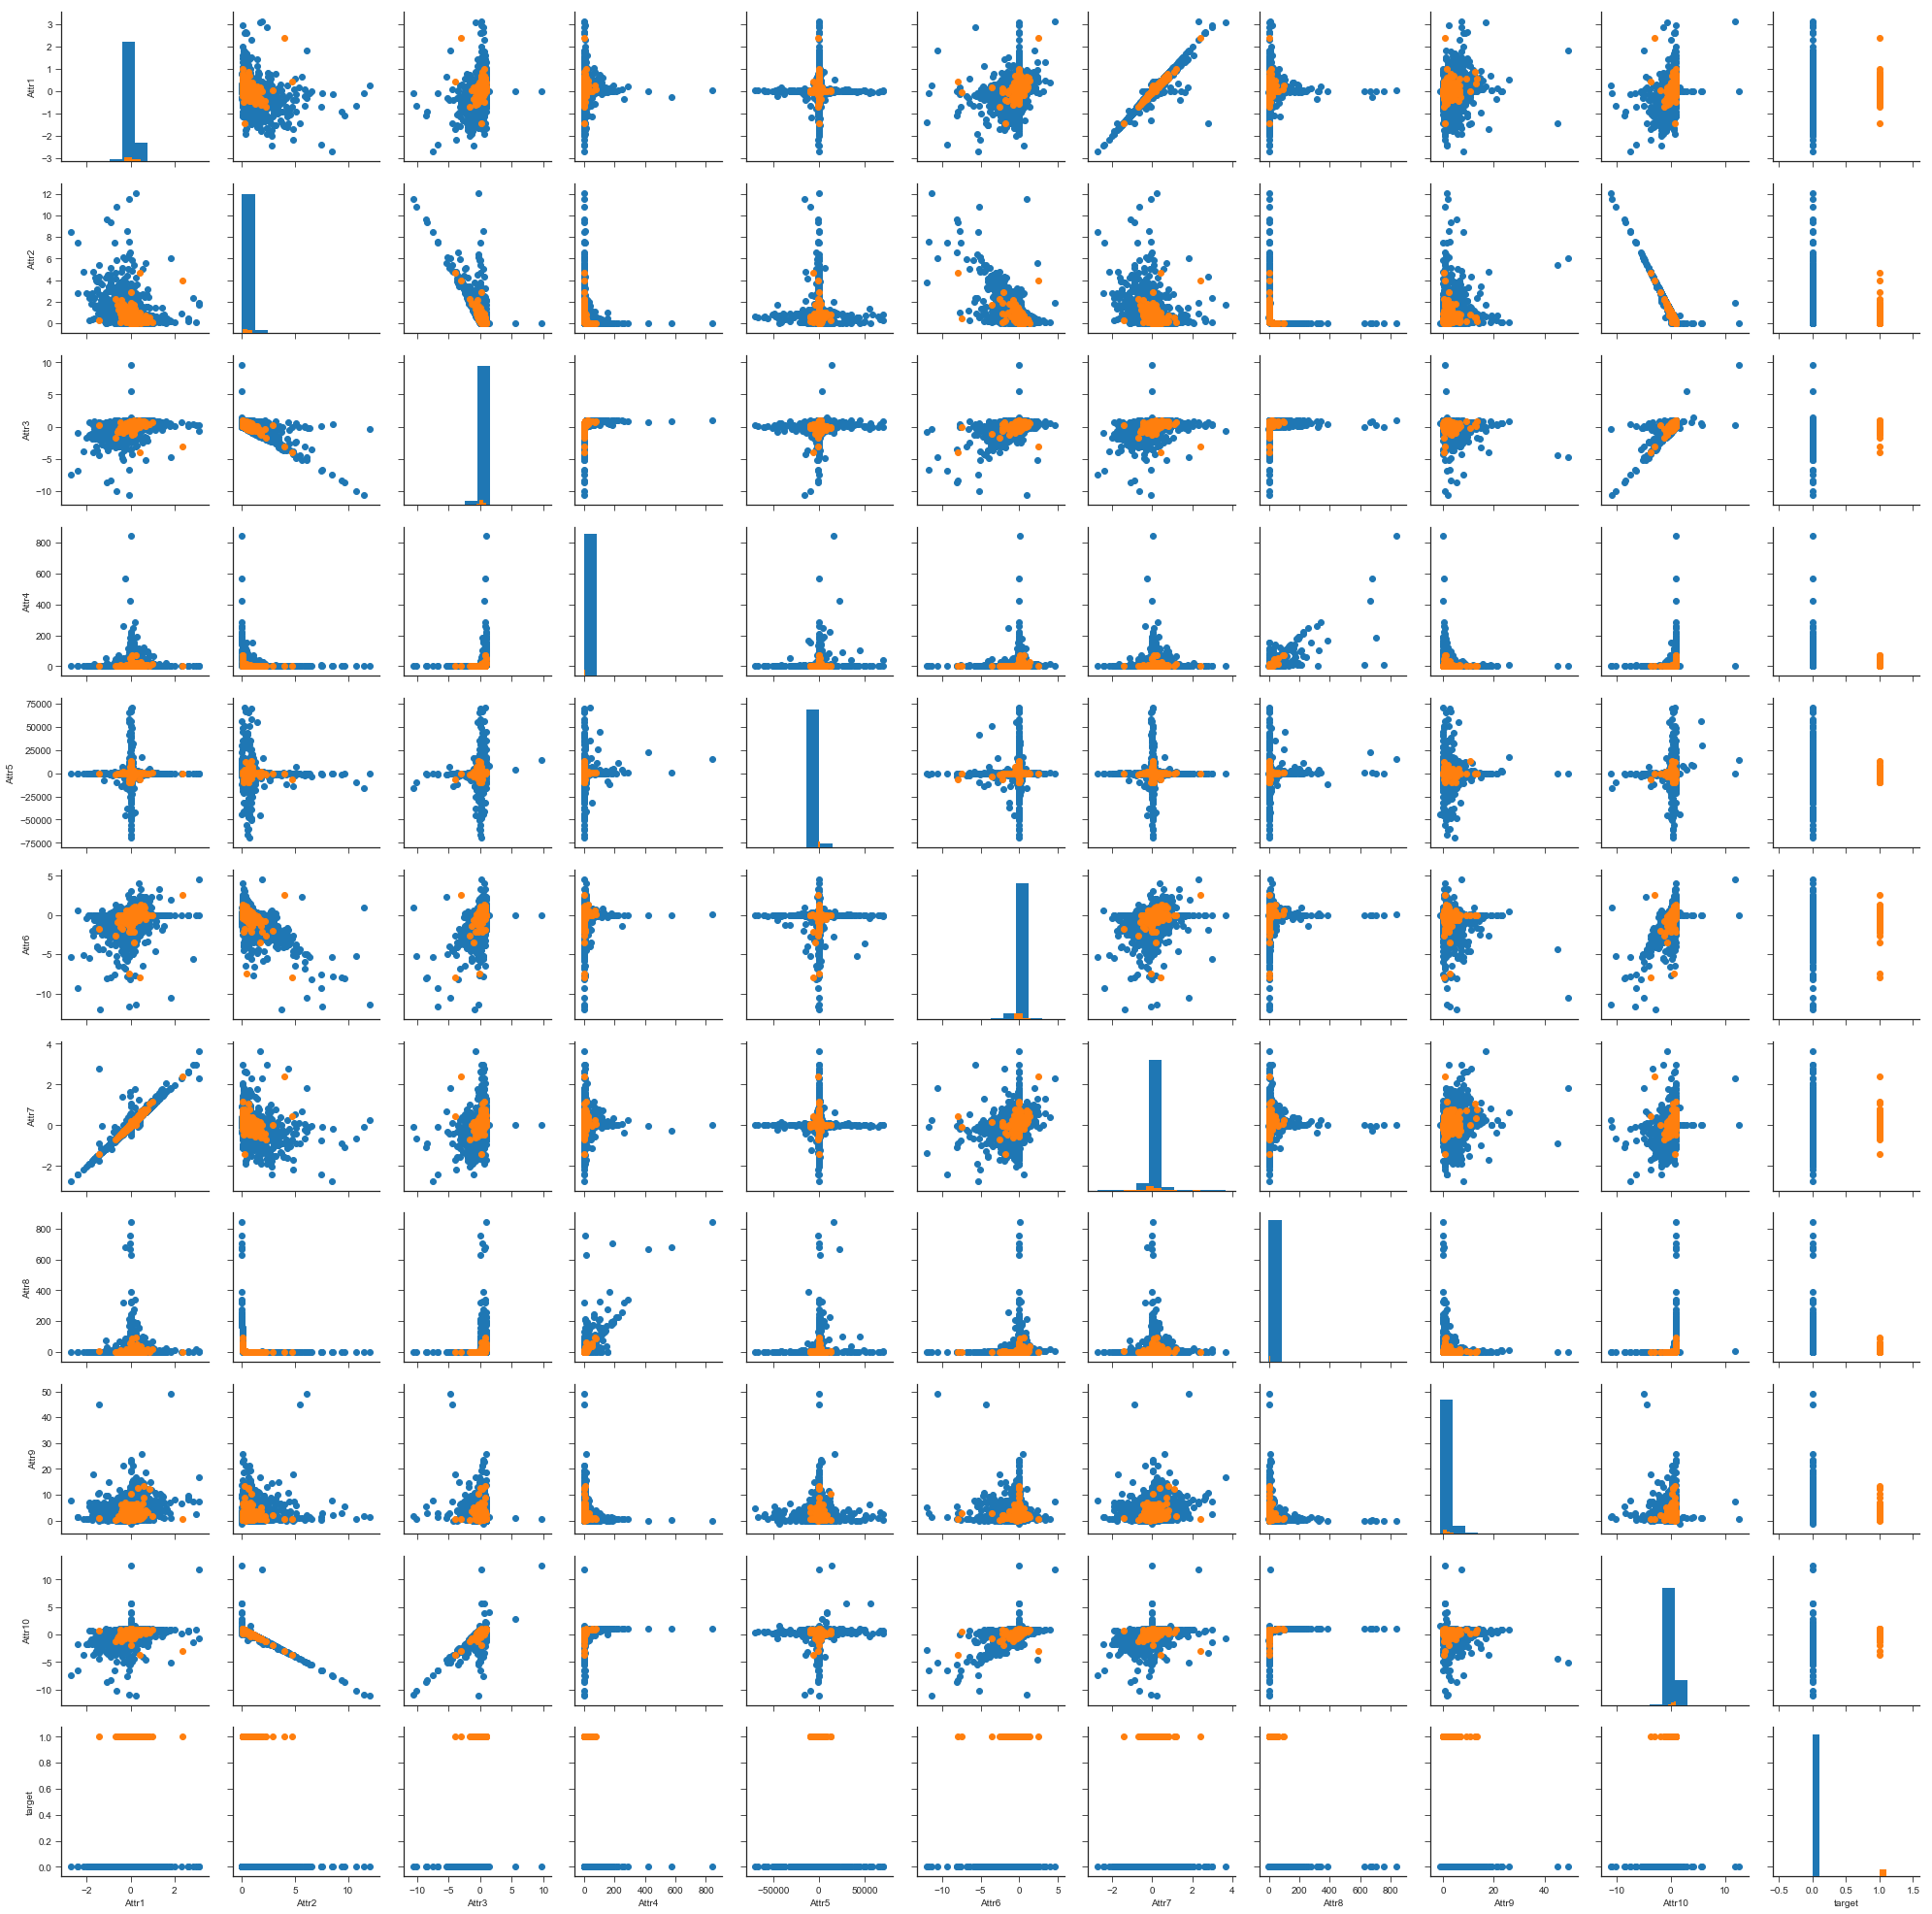

In [38]:
bankruptcyData_4_1 = pd.concat([bankruptcyData_4.iloc[:,0:10].reset_index(drop=True), 
                                bankruptcyData_4[['target']]], axis=1)
g = sns.PairGrid(bankruptcyData_4_1, hue="target")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

## Data PreProcessing

__Correlated features__

In [39]:
bankruptcyData_4

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
27546,0.000000,0.096063,0.587400,7.114800,NaN,-0.061417,0.000000,9.409800,0.000000,0.903940,0.000000,0.000000,NaN,0.000000,NaN,0.000000,10.41000,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.050394,0.000000,NaN,1.855700,2.8028,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.903940,NaN,1.393400,NaN,NaN,NaN,NaN,NaN,7.114800,NaN,0.000000,NaN,7.114800,0.096063,NaN,2.855700,2.855700,373.00000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0
3188,-0.026122,0.855100,0.532390,NaN,7600.50000,0.000000,-0.026122,0.169450,0.000000,0.144900,-0.026122,NaN,NaN,-0.026122,-11948.0000,-0.030548,1.16950,-0.026122,NaN,NaN,NaN,-0.026122,NaN,-0.026122,-0.026122,-0.030548,NaN,1.138500,2.7670,NaN,NaN,0.0000,NaN,0.028890,-0.024704,0.000000,1.000000,NaN,NaN,-1.091200,NaN,NaN,NaN,NaN,NaN,0.000000,-0.026122,NaN,0.622600,0.000000,0.000000,0.309870,2.138500,311.30000,NaN,-0.180280,NaN,5.901400,NaN,0.000000,NaN,NaN,0.000000,0
19291,-0.012535,0.025901,0.974100,38.609000,34983.00000,-0.025901,-0.012535,37.609000,0.000000,0.974100,-0.012535,-0.483970,NaN,-0.012535,-754.1800,-0.483970,38.60900,-0.012535,NaN,NaN,NaN,-0.012535,NaN,-0.012535,-0.038436,-0.483970,NaN,NaN,1.6936,NaN,NaN,943.1000,0.387020,0.387020,-0.010024,0.000000,0.974100,NaN,38.609000,-0.068875,NaN,NaN,NaN,NaN,38.609000,0.000000,-0.012535,NaN,38.609000,0.025901,2.583800,NaN,NaN,48.10200,NaN,-0.012868,NaN,0.000000,NaN,NaN,NaN,0.00000,NaN,0
211,-0.071275,0.105200,0.012489,1.582600,NaN,0.000000,-0.071275,8.505800,0.000000,0.894800,-0.071124,-3.325100,NaN,-0.071275,-538.7300,-0.677520,9.50580,-0.071275,NaN,NaN,NaN,0.000000,NaN,-0.071275,-2.595400,-0.677520,0.000000,0.012928,2.5541,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.894800,NaN,1.026700,NaN,NaN,NaN,NaN,NaN,1.582600,NaN,0.000000,NaN,0.322480,0.021435,NaN,0.926220,0.926220,4.47300,NaN,-0.079654,NaN,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0
23773,-0.007986,0.009743,0.990260,102.640000,44640.00000,0.000000,-0.007986,101.640000,0.000000,0.990260,-0.007986,-0.819670,NaN,-0.007986,-445.3000,-0.819670,102.64000,-0.007986,NaN,NaN,NaN,-0.007986,NaN,-0.007986,-0.007986,-0.819670,NaN,NaN,1.6997,NaN,NaN,445.3000,0.819670,0.819670,-0.007986,0.000000,0.990260,NaN,102.460000,-0.040667,NaN,NaN,NaN,NaN,102.640000,0.000000,-0.007986,NaN,102.640000,0.009743,1.220000,NaN,NaN,49.60000,NaN,-0.008064,NaN,0.000000,NaN,0.000000,NaN,0.00000,NaN,0
7733,-0.039076,0.945200,0.993540,154.830000,-9153.30000,0.000000,-0.039076,0.057975,0.000000,0.054798,-0.039076,-6.050300,NaN,-0.039076,-8828.9000,-0.041342,1.05800,-0.039076,NaN,NaN,NaN,-0.039395,NaN,-0.039076,-0.039076,-0.041342,NaN,NaN,2.7264,NaN,NaN,59.8390,6.099700,0.041679,-0.039395,0.000000,0.993540,NaN,150.250000,-0.799760,NaN,NaN,NaN,NaN,154.830000,0.000000,-0.039395,NaN,1.058000,0.006459,0.163940,NaN,NaN,529.19000,NaN,-0.713090,NaN,17.131000,NaN,0.000000,NaN,0.00000,NaN,0
10652,-0.314330,0.020001,0.980000,49.998000,77.16900,-0.055115,-0.314330,48.998000,0.000000,0.980000,-0.314330,-15.716000,NaN,-0.314330,-23.2250,-15.716000,49.99800,-0.314330,NaN,NaN,NaN,-0.315530,NaN,-0.314330,0.775660,-15.716000,NaN,NaN,2.3886,NaN,NaN,25.4580,14.338000,14.338000,-0.286760,0.000000,0.980000,NaN,45.924000,-0.002113,NaN,NaN,NaN,NaN,49.998000,0.000000,-0.315530,NaN,49.998000,0.020001,0.069747,NaN,NaN,239.79000,NaN,-0.320750,NaN,0.000000,NaN,0.000000,NaN,0.00000,NaN,0
11566,-0.509290,0.705980,0.294020,1.416500,207.83000,-0.799090,-0.509290,0.416470,0.000000,0.294020,-0.509270,-0.721400,NaN,-0.509290,-505.9600,-0.721400,1.41650,-0.509290,NaN,NaN,NaN,-0.509300,NaN,NaN,-0.380670,-0.7214

In [40]:
corr = bankruptcyData_4.corr()
corr_uns = corr.unstack()
corr_uns_sort = pd.DataFrame(corr_uns.sort_values(ascending=False, kind="quicksort")).reset_index().rename({
    'level_0':'col_1', 'level_1':'col_2', 0:'corr'}, axis='columns')


#get all correlations that are not between same variables and also not NA's
corr_uns_sort_1 = corr_uns_sort[corr_uns_sort['col_1'] != corr_uns_sort['col_2']]
corr_uns_sort_2 = corr_uns_sort_1.dropna()
corr_uns_sort_3 = corr_uns_sort_2.sort_values(by=['corr'], ascending=False)
#Select correlations more than .50
corr_uns_sort_4 = corr_uns_sort_3.loc[(corr_uns_sort_3['corr'] >= 0.60) | (corr_uns_sort_3['corr'] <= -0.60)]
#Remove duplicates
corr_uns_sort_5 = corr_uns_sort_4.groupby(['corr']).head(1).reset_index(drop=True)
corr_uns_sort_5

,col_1,col_2,corr
0,Attr7,Attr14,1.000000
1,Attr17,Attr8,0.998741
2,Attr32,Attr52,0.995528
3,Attr26,Attr16,0.994259
4,Attr19,Attr31,0.988924
5,Attr23,Attr19,0.979367
6,Attr19,Attr13,0.977836
7,Attr1,Attr14,0.977635
8,Attr54,Attr28,0.977466
9,Attr49,Attr42,0.972593


### Train-Test Split

In [41]:
X=bankruptcyData_4.drop('target', axis=1)
y=bankruptcyData_4["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24292, 63)
(6073, 63)
(24292,)
(6073,)


In [43]:
X_train.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
6222,0.029394,0.70624,-0.109760,0.78649,-34.922,0.000000,0.065508,0.41594,2.8153,0.29376,0.166350,0.127430,0.058153,0.065508,1574.5,0.231820,1.4159,0.065508,0.023269,16.44600,1.09430,0.165590,0.010441,0.205980,0.13674,0.180680,1.64200,-0.184250,3.4573,0.25083,0.052322,73.949,4.9358,3.592700,0.277970,2.8153,0.48594,0.098735,0.000148,0.089239,0.058819,52.408,35.961,0.23172,0.53972,18.24800,0.067381,0.023934,0.57247,0.51406,0.20260,0.49313,0.81575,-314.5500,0.098735,0.100060,0.97699,0.65422,22.1940,10.1500,66.648,5.4766,4.7260
16292,-0.157320,0.63349,0.038524,1.12490,-10.937,-0.400030,-0.150870,0.50610,0.9357,0.32061,-0.150870,-0.489310,-0.020058,-0.150870,-5784.6,-0.063099,1.5786,-0.150870,-0.075707,18.16500,0.93256,-0.139890,-0.078943,-0.374100,0.32061,-0.073279,-0.65681,0.058984,5.3056,0.30572,-0.075707,52.843,6.9073,-0.220820,-0.139890,1.9988,0.64576,-0.070194,0.080770,-0.718520,-0.070194,58.969,40.804,-1.58620,0.80329,16.99700,-0.250790,-0.125840,0.54755,0.30834,0.14478,0.49088,0.98871,7785.5000,-0.068716,-0.490700,1.06870,1.01420,20.0940,8.9453,56.474,6.4631,3.0512
10908,-0.014277,0.19532,0.531190,3.75560,39.249,0.000000,-0.015055,4.11970,1.6226,0.80468,-0.001278,-0.078098,0.006608,-0.015055,6649.4,0.054892,5.1197,-0.015055,-0.009278,85.30200,0.98221,-0.001667,-0.008799,0.050386,0.49031,0.058874,-0.12097,1.924300,4.2553,0.10172,-0.009244,52.274,7.0576,6.965300,0.276600,1.6226,0.80468,0.170470,0.198850,0.270050,-0.001027,154.230,68.931,-0.03765,1.78850,101.73000,-0.027443,-0.016913,3.70650,0.19277,0.14169,2.91510,2.91510,3.7556,0.170470,-0.017742,0.84324,0.00000,4.2789,5.2951,43.363,8.4173,5.8780
29201,0.033791,0.75131,-0.136480,0.69088,-75.318,0.033791,0.019775,0.32299,1.0494,0.24266,0.019775,0.044790,0.050285,0.019775,3733.2,0.097771,1.3310,0.019775,0.013537,34.93200,0.46753,0.060043,0.023132,0.019775,0.24266,0.116430,NaN,-0.196390,4.4729,0.51213,0.013537,115.760,3.1530,0.079918,0.060043,1.4681,0.55247,0.041102,0.015627,0.217200,0.041102,74.490,39.558,0.24169,0.37422,36.65800,0.006361,0.004354,0.40599,0.44151,0.31716,0.34919,0.79499,-4055.0000,0.047069,0.139250,0.95293,1.27670,10.4490,9.2270,110.310,3.3087,2.1021
24745,0.023275,0.63973,0.250210,1.39110,19.757,0.176300,0.042032,0.34347,1.0142,0.21973,0.042032,0.065702,0.009637,0.042032,5374.7,0.067911,1.5632,0.042032,0.009324,0.45429,1.06580,0.044552,0.005163,0.239520,0.21973,0.038591,0.10023,2.273200,3.4342,0.11448,0.009324,52.532,6.9482,0.069642,0.044552,4.5116,0.21973,0.009883,0.194400,0.457570,0.009883,61.985,61.531,4.14820,1.38230,0.46074,0.043139,0.009569,1.39110,0.63973,0.14392,1.99640,1.99640,680.0400,0.013986,0.105930,0.98601,0.00000,803.4500,5.9320,51.797,7.0468,40.9580


In [44]:
X_train.shape

(24292, 63)

__Inpute externally using fancyimpute__

In [45]:
pd.DataFrame({'total_missing': X_train.isnull().sum(), 
              'perc_missing': (X_train.isnull().sum()/X_train.shape[0])*100})

,total_missing,perc_missing
Attr1,1,0.004117
Attr2,1,0.004117
Attr3,1,0.004117
Attr4,45,0.185246
Attr5,39,0.160547
Attr6,1,0.004117
Attr7,1,0.004117
Attr8,25,0.102915
Attr9,1,0.004117
Attr10,1,0.004117


__So we can see there are a set of variables that are highly correlated, we need to identify the important features & implement our algo based on them__


__1. Using Random Forest__


In [46]:
rf_feature_selection_model = RandomForestClassifier(n_estimators=1000, max_depth=3,random_state=0, 
                                                    max_features=9)
X_train_selection_model = X_train.fillna(X_train.mean())
rf_feature_selection_model.fit(X_train_selection_model, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
X_test_selection_model = X_test.fillna(X_train.mean())
y_test_pred = rf_feature_selection_model.predict(X_test_selection_model)
f1_score(y_test, y_test_pred)

0.0

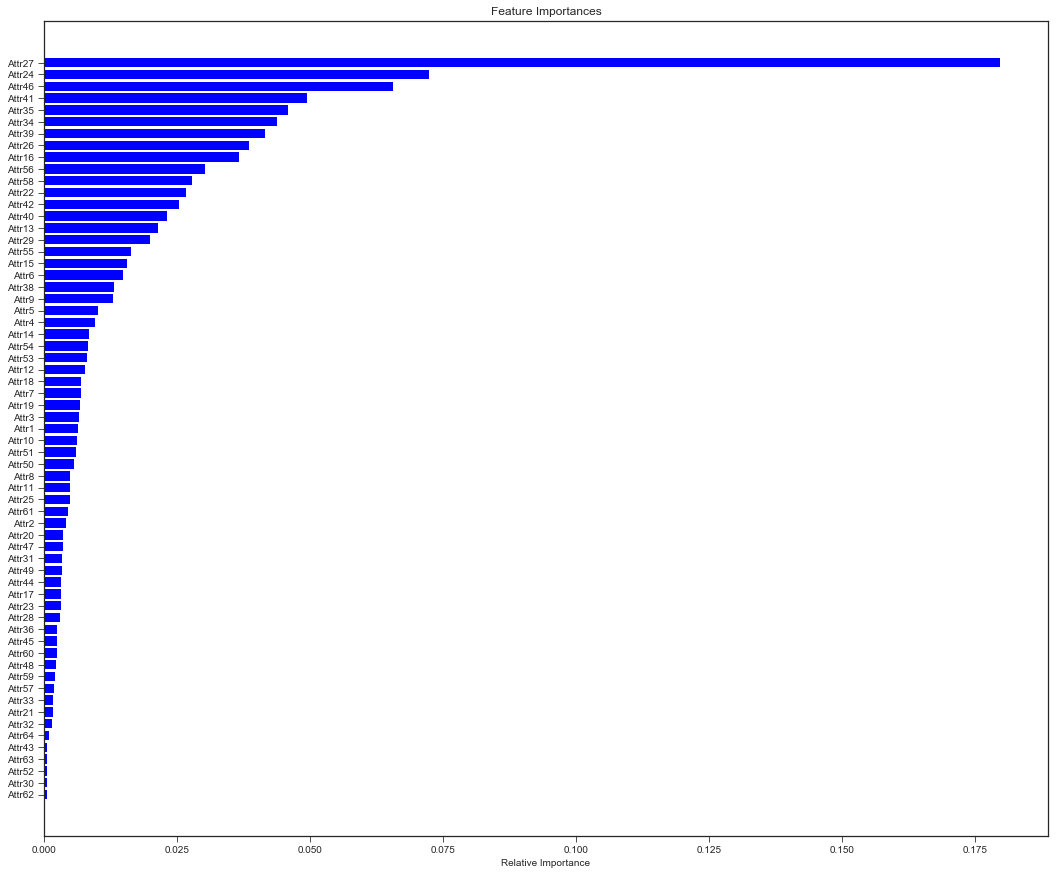

In [48]:
features = X_train_selection_model.columns
importances = rf_feature_selection_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (18,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();


__2. Feature Selection by importance with RFE__

In [49]:
cat_col = ['target']
num_col = np.setdiff1d(X_train.columns, cat_col)

cat_col
num_col

['target']

array(['Attr1', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr2',
       'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25',
       'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr3', 'Attr30',
       'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr38', 'Attr39', 'Attr4', 'Attr40', 'Attr41', 'Attr42',
       'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48',
       'Attr49', 'Attr5', 'Attr50', 'Attr51', 'Attr52', 'Attr53',
       'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr6', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'Attr7',
       'Attr8', 'Attr9'], dtype=object)

In [50]:
X_train_num = X_train[num_col]

In [51]:
X_train_num.head()

,Attr1,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr2,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr3,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr4,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr5,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr6,Attr60,Attr61,Attr62,Attr63,Attr64,Attr7,Attr8,Attr9
6222,0.029394,0.29376,0.166350,0.127430,0.058153,0.065508,1574.5,0.231820,1.4159,0.065508,0.023269,0.70624,16.44600,1.09430,0.165590,0.010441,0.205980,0.13674,0.180680,1.64200,-0.184250,3.4573,-0.109760,0.25083,0.052322,73.949,4.9358,3.592700,0.277970,2.8153,0.48594,0.098735,0.78649,0.000148,0.089239,0.058819,52.408,35.961,0.23172,0.53972,18.24800,0.067381,0.023934,-34.922,0.57247,0.51406,0.20260,0.49313,0.81575,-314.5500,0.098735,0.100060,0.97699,0.65422,0.000000,22.1940,10.1500,66.648,5.4766,4.7260,0.065508,0.41594,2.8153
16292,-0.157320,0.32061,-0.150870,-0.489310,-0.020058,-0.150870,-5784.6,-0.063099,1.5786,-0.150870,-0.075707,0.63349,18.16500,0.93256,-0.139890,-0.078943,-0.374100,0.32061,-0.073279,-0.65681,0.058984,5.3056,0.038524,0.30572,-0.075707,52.843,6.9073,-0.220820,-0.139890,1.9988,0.64576,-0.070194,1.12490,0.080770,-0.718520,-0.070194,58.969,40.804,-1.58620,0.80329,16.99700,-0.250790,-0.125840,-10.937,0.54755,0.30834,0.14478,0.49088,0.98871,7785.5000,-0.068716,-0.490700,1.06870,1.01420,-0.400030,20.0940,8.9453,56.474,6.4631,3.0512,-0.150870,0.50610,0.9357
10908,-0.014277,0.80468,-0.001278,-0.078098,0.006608,-0.015055,6649.4,0.054892,5.1197,-0.015055,-0.009278,0.19532,85.30200,0.98221,-0.001667,-0.008799,0.050386,0.49031,0.058874,-0.12097,1.924300,4.2553,0.531190,0.10172,-0.009244,52.274,7.0576,6.965300,0.276600,1.6226,0.80468,0.170470,3.75560,0.198850,0.270050,-0.001027,154.230,68.931,-0.03765,1.78850,101.73000,-0.027443,-0.016913,39.249,3.70650,0.19277,0.14169,2.91510,2.91510,3.7556,0.170470,-0.017742,0.84324,0.00000,0.000000,4.2789,5.2951,43.363,8.4173,5.8780,-0.015055,4.11970,1.6226
29201,0.033791,0.24266,0.019775,0.044790,0.050285,0.019775,3733.2,0.097771,1.3310,0.019775,0.013537,0.75131,34.93200,0.46753,0.060043,0.023132,0.019775,0.24266,0.116430,NaN,-0.196390,4.4729,-0.136480,0.51213,0.013537,115.760,3.1530,0.079918,0.060043,1.4681,0.55247,0.041102,0.69088,0.015627,0.217200,0.041102,74.490,39.558,0.24169,0.37422,36.65800,0.006361,0.004354,-75.318,0.40599,0.44151,0.31716,0.34919,0.79499,-4055.0000,0.047069,0.139250,0.95293,1.27670,0.033791,10.4490,9.2270,110.310,3.3087,2.1021,0.019775,0.32299,1.0494
24745,0.023275,0.21973,0.042032,0.065702,0.009637,0.042032,5374.7,0.067911,1.5632,0.042032,0.009324,0.63973,0.45429,1.06580,0.044552,0.005163,0.239520,0.21973,0.038591,0.10023,2.273200,3.4342,0.250210,0.11448,0.009324,52.532,6.9482,0.069642,0.044552,4.5116,0.21973,0.009883,1.39110,0.194400,0.457570,0.009883,61.985,61.531,4.14820,1.38230,0.46074,0.043139,0.009569,19.757,1.39110,0.63973,0.14392,1.99640,1.99640,680.0400,0.013986,0.105930,0.98601,0.00000,0.176300,803.4500,5.9320,51.797,7.0468,40.9580,0.042032,0.34347,1.0142


### Building Pipeline

__Handle class imbalance : Smote__

In [52]:
np.bincount(y_train)

array([23207,  1085])

In [53]:
smt = SMOTE(sampling_strategy={0:np.bincount(y_train)[0],1:7650}, random_state=42)
smt

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=42, ratio=None,
   sampling_strategy={0: 23207, 1: 7650}, svm_estimator='deprecated')

__Impute and scale attributes__

In [54]:
numeric_transformer = Pipeline(memory ='./' ,steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col)])

## Model Building

In [56]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

__Append model to pipeline__

In [57]:
xgbModel = XGBClassifier() 
clf = impipe(steps=[('preprocessor', preprocessor),
                    ('sampling', smt),
                    ('classifier', xgbModel)])

In [58]:
clf

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [59]:
# Use a grid over parameters of interest
search_space = [{'classifier': [XGBClassifier()],
                 'classifier__n_estimators': [300, 600, 900],
                 'classifier__gamma': [0.4],
                'classifier__learning_rate': [0.1],
                'classifier__max_depth': [3,5],
                'classifier__scale_pos_weight': [3],
                'classifier__booster':['gbtree', 'dart']}]

CV_xgbModel = GridSearchCV(clf, param_grid=search_space, cv= 10, scoring='f1', n_jobs=-1, verbose=3)
CV_xgbModel.fit(X=X_train, y=y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 117.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier': [XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.4, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='binary:logisti...max_depth': [3, 5], 'classifier__scale_pos_weight': [3], 'classifier__booster': ['gbtree', 'dart']}],
       pre_dispatch='2*n_jobs', refit=

In [60]:
print('Best score and parameter combination = ')

print(CV_xgbModel.best_score_)    
print(CV_xgbModel.best_params_)    

Best score and parameter combination = 
0.7549685911440637
{'classifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.4, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1), 'classifier__booster': 'gbtree', 'classifier__gamma': 0.4, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 900, 'classifier__scale_pos_weight': 3}


In [61]:
# View best model
CV_xgbModel.best_estimator_.get_params()['classifier']

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.4, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1)

__Training data evaluation__

In [62]:
y_train_pred = CV_xgbModel.predict(X_train)
print(f1_score(y_train,y_train_pred))

1.0


__Grid search execution stat__

In [63]:
pd.DataFrame(CV_xgbModel.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__booster,param_classifier__gamma,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,151.101456,2.394340,0.040349,0.004160,"XGBClassifier(base_score=0.5, booster='gbtree'...",gbtree,0.4,0.1,3,300,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.586207,0.547368,0.533333,0.562092,0.493827,0.468966,0.543131,0.544850,0.577922,0.508475,0.536618,0.035001,11,0.673764,0.668712,0.657080,0.656471,0.665674,0.670939,0.666417,0.653860,0.642779,0.660245,0.661594,0.008878
1,203.065643,7.057873,0.073067,0.007277,"XGBClassifier(base_score=0.5, booster='gbtree'...",gbtree,0.4,0.1,3,600,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.666667,0.678733,0.669388,0.706349,0.617886,0.585153,0.641667,0.653386,0.672000,0.619247,0.651051,0.033751,9,0.848649,0.866759,0.850114,0.853871,0.855839,0.864118,0.861240,0.846920,0.842344,0.856619,0.854647,0.007439
2,259.282350,3.494326,0.101005,0.003885,"XGBClassifier(base_score=0.5, booster='gbtree'...",gbtree,0.4,0.1,3,900,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.726415,0.724638,0.699115,0.722689,0.635193,0.622642,0.711712,0.699115,0.732759,0.676190,0.695047,0.036794,7,0.934698,0.947317,0.945401,0.933138,0.942214,0.943710,0.943544,0.935593,0.934109,0.937743,0.939747,0.004977
3,175.478573,1.753288,0.069209,0.003462,"XGBClassifier(base_score=0.5, booster='gbtree'...",gbtree,0.4,0.1,5,300,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.745098,0.735294,0.754545,0.750000,0.654206,0.663366,0.691244,0.712963,0.762332,0.688679,0.715775,0.037370,5,0.966068,0.967419,0.964108,0.969454,0.962742,0.963257,0.965552,0.958580,0.958891,0.959921,0.963599,0.003475
4,281.539826,1.691017,0.129851,0.008852,"XGBClassifier(base_score=0.5, booster='gbtree'...",gbtree,0.4,0.1,5,600,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.783069,0.736842,0.786070,0.788462,0.750000,0.687831,0.735294,0.740000,0.807882,0.701031,0.751652,0.037346,3,0.998976,0.999488,0.999488,0.999488,1.000000,1.000000,0.999488,0.998978,0.998978,0.999488,0.999437,0.000358
5,381.951612,2.133368,0.153127,0.008491,"XGBClassifier(base_score=0.5, booster='gbtree'...",gbtree,0.4,0.1,5,900,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.785340,0.740741,0.790000,0.786408,0.750000,0.687831,0.746269,0.737374,0.824121,0.701571,0.754969,0.039860,1,0.999488,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999949,0.000154
6,187.353269,2.503800,0.044365,0.005518,"XGBClassifier(base_score=0.5, booster='gbtree'...",dart,0.4,0.1,3,300,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.586207,0.547368,0.533333,0.562092,0.493827,0.468966,0.543131,0.544850,0.577922,0.508475,0.536618,0.035001,11,0.673764,0.668712,0.657080,0.656471,0.665674,0.670939,0.666417,0.653860,0.642779,0.660245,0.661594,0.008878
7,445.591715,2.128671,0.077950,0.004388,"XGBClassifier(base_score=0.5, booster='gbtree'...",dart,0.4,0.1,3,600,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.666667,0.678733,0.669388,0.706349,0.617886,0.585153,0.641667,0.653386,0.672000,0.619247,0.651051,0.033751,9,0.848649,0.866759,0.850114,0.853871,0.855839,0.864118,0.861240,0.846920,0.842344,0.856619,0.854647,0.007439
8,825.906567,5.199652,0.108251,0.002559,"XGBClassifier(base_score=0.5, booster='gbtree'...",dart,0.4,0.1,3,900,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.726415,0.724638,0.699115,0.722689,0.635193,0.6

## Evaluate the model

__F1 Score__

1. In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy.
2. F1 Score = 2*(Recall * Precision) / (Recall + Precision)
3. F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
4. The F1 score is the harmonic average of the precision and recall,where an F1 score reaches it's best valueat 1 (perfect precision and recall) and worst at 0
5. Both High Precession & High Recall is needed.

In [64]:
X_test.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
29913,-0.202270,0.34303,0.126090,1.4387,-29.2860,0.000000,-0.16531,1.91520,0.81194,0.65697,-0.163210,-0.575220,-0.185290,-0.16531,-832.23,-0.438580,2.9152,-0.16531,-0.203600,93.635,0.82921,-0.166760,-0.249120,-0.020968,0.203680,-0.546330,-79.3700,0.214980,3.5139,0.342250,-0.203340,109.000,3.9490,3.3084,-0.150450,0.97173,0.65697,-0.185290,0.257690,-0.075276,-0.205390,152.580,58.947,-0.971110,0.98247,79.002,-0.181630,-0.223690,1.20540,0.28739,0.29864,1.12010,1.1201,411.68,-0.185210,-0.307890,1.16790,0.000,3.8981,6.1920,129.190,2.8253,1.3843
15995,0.305430,0.17293,0.116210,1.6720,-3.7438,0.573440,0.37907,4.59030,0.91474,0.79381,0.379070,2.192000,0.426950,0.37907,155.65,2.345000,5.7827,0.37907,0.399090,45.885,1.08100,0.381070,0.321560,0.713790,0.793810,1.919200,3.6699,0.163480,4.2629,0.166580,0.399090,60.788,6.0045,2.2036,0.381070,1.45920,0.79381,0.401200,0.127420,0.013951,0.401200,102.640,56.759,2.557900,0.98154,41.973,0.354620,0.373350,1.67200,0.17293,0.16654,1.11670,1.1167,2128.70,-0.093207,0.384770,1.09320,0.000,7.9547,6.4307,66.454,5.4925,1.3362
16336,0.021367,0.83888,0.039631,1.1460,-26.4990,0.000000,0.04165,0.19206,1.83980,0.16112,0.067363,0.153470,0.043766,0.04165,3802.70,0.095984,1.1921,0.04165,0.022639,32.670,0.80324,0.060835,0.011614,0.013036,0.057817,0.071805,2.3659,0.057522,3.9859,0.438200,0.036615,56.379,6.4740,2.0945,0.082768,1.83980,0.71197,0.044988,0.125750,0.280460,0.033067,54.935,22.265,0.129750,0.53926,34.209,0.021966,0.011939,0.37076,0.27140,0.15446,0.23385,1.0334,383.65,0.044988,0.132620,0.97758,3.419,11.1720,16.3940,53.843,6.7790,2.6703
9516,0.288480,0.19498,0.303420,2.7241,76.2270,-1.855800,0.32972,4.12870,1.14400,0.80502,0.350500,1.873500,0.332350,0.32972,187.19,1.949900,5.1287,0.32972,0.288220,37.059,1.72620,0.294180,0.252170,0.551360,-1.567400,1.738400,14.1560,0.582850,3.1942,-0.029806,0.288220,69.664,5.2394,4.7291,0.221910,1.14400,0.80502,0.193980,1.317100,0.018858,0.257150,79.004,41.944,2.483600,2.06410,45.978,0.243700,0.213020,2.45880,0.17599,0.19086,1.54640,1.5464,474.50,0.193980,0.358350,0.74115,0.000,9.8491,8.7020,56.151,6.5004,2.1975
17342,0.007050,0.27188,0.612090,3.3105,8.7307,0.002182,0.00705,2.67810,1.52270,0.72812,0.009514,0.026611,0.088315,0.00705,737.94,0.494620,3.6781,0.00705,0.004630,140.070,1.01390,0.000000,0.004630,0.034066,0.660460,0.494620,0.0000,4.976800,3.8890,0.170890,0.009220,93.664,3.8969,3.7971,0.005839,1.52270,0.72812,0.003835,0.065994,0.071120,0.000000,206.030,65.968,0.012065,1.10480,206.590,-0.127430,-0.083685,3.22570,0.26492,0.25661,5.92020,5.9202,4740.40,0.322020,0.009682,0.68474,0.000,2.6059,5.5330,63.502,5.7478,12.3810


__Impute using Fancy imputer__

__Evaluate Test data__

In [65]:
y_test_pred = CV_xgbModel.predict(X_test)
y_test_pred_prob = CV_xgbModel.predict_proba(X_test)
f1_score(y_test,y_test_pred)

0.7283702213279679

__Evaluation matrix__

In [66]:
print(classification_report(y_test,y_test_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9838    0.9931    0.9884      5797
           1     0.8190    0.6558    0.7284       276

   micro avg     0.9778    0.9778    0.9778      6073
   macro avg     0.9014    0.8244    0.8584      6073
weighted avg     0.9763    0.9778    0.9766      6073



In [67]:
accuracy_score(y_test,y_test_pred)

0.9777704594105056

__Confustion matrix__

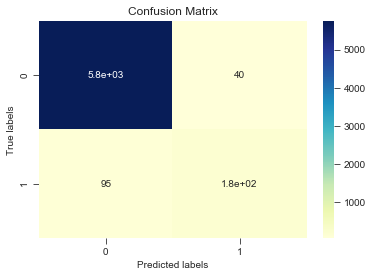

In [68]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu");
cm
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']);
ax.yaxis.set_ticklabels(['0', '1']);


In [69]:
y_test_pred_prob_1 = y_test_pred_prob[:, 1]
y_test_pred_prob_1

array([2.7776924e-01, 2.2456758e-05, 6.3643359e-02, ..., 3.3504170e-06,
       4.6608791e-05, 1.4359314e-03], dtype=float32)

__Precision & Recall curve__

<Figure size 576x576 with 0 Axes>

f1=0.728 ap=0.799


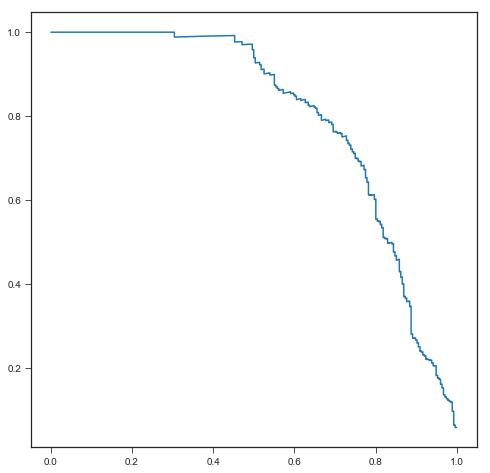

In [70]:
plt.figure(figsize = (8,8))
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob_1)
# calculate F1 score
f1 = f1_score(y_test, y_test_pred)
# calculate average precision score
ap = average_precision_score(y_test, y_test_pred_prob_1)
print('f1=%.3f ap=%.3f' % (f1, ap))
# plot the roc curve for the model
plt.plot(recall, precision);
# show the plot
plt.show()

__Find the optimal point__

In [71]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob_1)

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

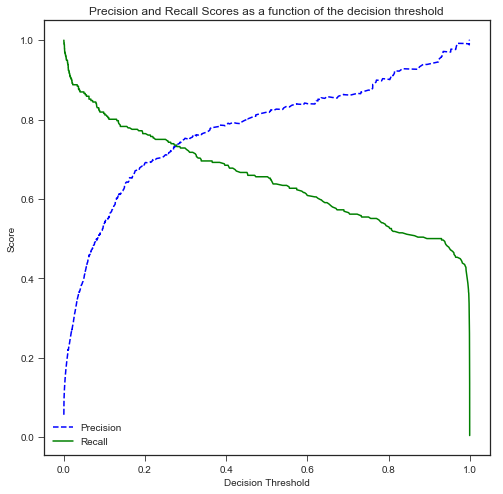

In [73]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

__ROC Curve__

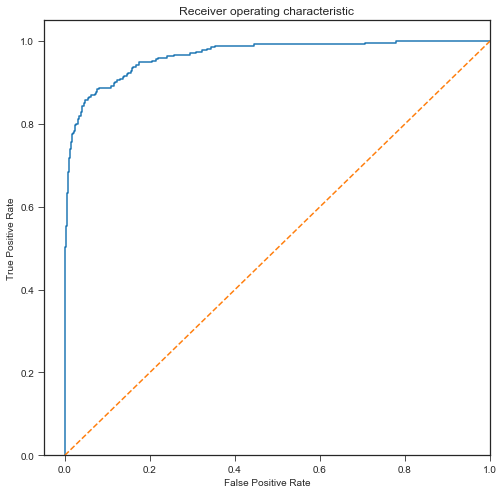

0.9660437807661633


In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thre = roc_curve(y_test, y_test_pred_prob_1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

print(roc_auc_score(y_test, y_test_pred_prob_1));

__Check Accuracy with new threshold__

In [88]:
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_test_pred_prob_bin_1 = binarize(y_test_pred_prob, 0.3)[:,1]
y_test_pred_prob_bin_1


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [89]:
f1_score(y_test,y_test_pred_prob_bin_1)

0.7380073800738007

In [90]:
print(classification_report(y_test,y_test_pred_prob_bin_1,digits=4))

              precision    recall  f1-score   support

           0     0.9869    0.9886    0.9878      5797
           1     0.7519    0.7246    0.7380       276

   micro avg     0.9766    0.9766    0.9766      6073
   macro avg     0.8694    0.8566    0.8629      6073
weighted avg     0.9762    0.9766    0.9764      6073



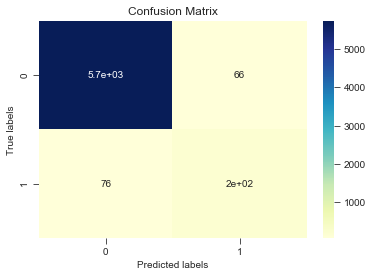

In [91]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_test_pred_prob_bin_1)
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu");
cm
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']);
ax.yaxis.set_ticklabels(['0', '1']);


## Run the model on actual test data

In [79]:
#Load test data
bankruptcyData_test=pd.read_csv("/Users/samyam/Documents/Samya/Insofe/insofe/CSE7305c_CUTe_ProblemDescription_and_Dataset/test.csv",
                             na_values=["NA"])
print("The number of Rows in the Income Group data set  ="+str(bankruptcyData_test.shape[0]))
print("The number of Columns in the Income Group data set =" +str(bankruptcyData_test.shape[1]))


The number of Rows in the Income Group data set  =6451
The number of Columns in the Income Group data set =65


In [80]:
bankruptcyData_test.head(10)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,36554,0.200550,0.37951,0.396410,2.04720,32.351,0.388250,0.249760,1.330500,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.6349,0.249760,0.149420,43.370,1.2479,0.214020,0.119980,0.477060,0.504940,0.604110,1.458200,1.761500,5.9443,0.117880,0.149420,94.140,3.8772,0.563930,0.214020,1.74100,593.27000,0.505910,0.128040,0.662950,0.051402,0.128040,114.420,71.050,1.009700,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,36555,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.582230,1.33320,0.367980,0.043162,0.033921,0.038938,0.014434,4443.70,0.082138,1.5822,0.014434,0.010827,36.623,1.0752,0.030778,0.006766,0.000222,0.348280,0.073572,1.071400,0.103190,5.9479,0.474050,0.010827,142.090,2.6284,1.769700,0.240130,1.33320,2.75380,0.493440,0.180110,0.072677,0.308650,0.023085,122.740,86.122,0.067430,0.81192,43.654,-0.006701,-0.005026,0.75832,0.42554,0.38046,0.70666,0.94760,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603
2,36556,0.124080,0.83837,0.142040,1.16940,-91.883,0.000000,0.153280,0.192790,2.11560,0.161630,0.184540,0.182840,0.075411,0.153280,1918.10,0.190300,1.1928,0.153280,0.072451,109.970,1.5866,0.158190,0.058651,NaN,0.154450,0.155470,5.059200,7.229100,3.8430,0.388030,0.077401,157.150,2.3226,2.322400,0.168540,2.11560,NaN,0.161630,0.079665,0.020833,0.169940,0.074772,166.130,56.159,0.194670,0.40912,119.490,0.151920,0.071812,1.16940,0.83831,0.43056,8.22600,8.22600,989.4100,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.630,2.5236,107.6700
3,36557,0.203930,0.56037,0.134950,1.24080,3.158,0.000000,0.242910,0.784520,2.27060,0.439630,0.249910,0.433470,0.117000,0.242910,769.91,0.474080,1.7845,0.242910,0.106980,14.612,1.7474,0.231730,0.089812,NaN,0.409290,0.404520,33.062000,0.442930,3.7222,0.085140,0.107640,100.950,3.6156,3.615600,0.244540,2.27060,NaN,0.439630,0.107700,0.702260,0.073400,0.102060,48.514,33.901,2.243400,1.07860,16.376,0.208970,0.092033,1.24080,0.56037,0.27658,1.44290,1.44290,711.8500,0.107700,0.463860,0.89419,0.000000,24.9790,10.7670,90.080,4.0519,7.4525
4,36558,-0.054623,0.92857,-0.026927,0.94263,-87.724,-0.054623,-0.054623,0.074796,0.92301,0.069453,-0.054623,-0.116370,-0.021237,-0.054623,-21123.00,-0.017279,1.0769,-0.054623,-0.072298,77.569,NaN,-0.062889,-0.072298,-0.054623,0.069453,-0.017279,-0.768290,-0.048297,4.7985,1.175200,-0.072298,209.300,1.7439,-0.067726,-0.062889,0.78894,0.61391,0.528630,-0.083238,0.092184,-1.255800,-0.083238,192.850,115.280,-0.340200,0.60056,71.596,-0.101470,-0.134300,0.47650,0.46939,0.57343,0.12457,0.94816,-1693.2000,-0.083417,-0.786480,1.08340,6.611400,4.7055,3.1662,226.760,1.6096,1.3551
5,36559,0.140900,0.75560,0.338860,1.63880,-11.094,0.367620,0.140900,0.323440,1.05080,0.244400,0.140900,0.265620,0.058424,0.140900,1839.40,0.198440,1.3234,0.140900,0.054902,58.710,1.3822,0.120790,0.054902,0.367620,0.244400,0.198440,0.494540,2.593300,4.3830,0.244280,0.054902,79.276,4.6042,0.159860,0.120790,2.61970,2.02780,0.469520,0.047064,0.244510,0.191350,0.047064,105.190,46.479,0.341320,0.86058,61.692,0.111750,0.043543,1.15050,0.53048,0.21719,1.87040,3.59330,8185.6000,0.048331,0.576540,0.95167,0.921160,6.2170,7.8531,75.444,4.8380,19.6410
6,36560,0.013079,0.75841,-0.060128,0.90444,-58.080,0.069955,0.012298,0.299580,0.99307,0.227210,0.012298,0.019544,0.015526,0.012298,7099.80,0.051410,1.3186,0.012298,0.004897,49.665,1.2765,-0.018598,0.005208,0.083487,0.227210,0.052440,-0.073544,-0.139540,4.2688,0.297040,0.0

In [81]:
pd.DataFrame({'total_missing': bankruptcyData_test.isnull().sum(), 
              'perc_missing': (bankruptcyData_test.isnull().sum()/bankruptcyData_test.shape[0])*100})

,total_missing,perc_missing
ID,0,0.000000
Attr1,0,0.000000
Attr2,0,0.000000
Attr3,0,0.000000
Attr4,22,0.341032
Attr5,13,0.201519
Attr6,0,0.000000
Attr7,0,0.000000
Attr8,14,0.217021
Attr9,2,0.031003


In [82]:
bankruptcyData_test_1 = bankruptcyData_test.drop(['ID', 'Attr37'], axis=1)

In [83]:
bankruptcyData_test_1.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
Attr31    float64
Attr32    float64
Attr33    float64
Attr34    float64
Attr35    float64
Attr36    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    

In [84]:
bankruptcyData_test_1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.200550,0.37951,0.396410,2.04720,32.351,0.388250,0.249760,1.330500,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.6349,0.249760,0.149420,43.370,1.2479,0.214020,0.119980,0.477060,0.504940,0.604110,1.45820,1.761500,5.9443,0.11788,0.149420,94.14,3.8772,0.563930,0.214020,1.74100,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.582230,1.33320,0.367980,0.043162,0.033921,0.038938,0.014434,4443.70,0.082138,1.5822,0.014434,0.010827,36.623,1.0752,0.030778,0.006766,0.000222,0.348280,0.073572,1.07140,0.103190,5.9479,0.47405,0.010827,142.09,2.6284,1.769700,0.240130,1.33320,0.49344,0.180110,0.072677,0.308650,0.023085,122.740,86.122,0.06743,0.81192,43.654,-0.006701,-0.005026,0.75832,0.42554,0.38046,0.70666,0.94760,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603
2,0.124080,0.83837,0.142040,1.16940,-91.883,0.000000,0.153280,0.192790,2.11560,0.161630,0.184540,0.182840,0.075411,0.153280,1918.10,0.190300,1.1928,0.153280,0.072451,109.970,1.5866,0.158190,0.058651,NaN,0.154450,0.155470,5.05920,7.229100,3.8430,0.38803,0.077401,157.15,2.3226,2.322400,0.168540,2.11560,0.16163,0.079665,0.020833,0.169940,0.074772,166.130,56.159,0.19467,0.40912,119.490,0.151920,0.071812,1.16940,0.83831,0.43056,8.22600,8.22600,989.4100,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.630,2.5236,107.6700
3,0.203930,0.56037,0.134950,1.24080,3.158,0.000000,0.242910,0.784520,2.27060,0.439630,0.249910,0.433470,0.117000,0.242910,769.91,0.474080,1.7845,0.242910,0.106980,14.612,1.7474,0.231730,0.089812,NaN,0.409290,0.404520,33.06200,0.442930,3.7222,0.08514,0.107640,100.95,3.6156,3.615600,0.244540,2.27060,0.43963,0.107700,0.702260,0.073400,0.102060,48.514,33.901,2.24340,1.07860,16.376,0.208970,0.092033,1.24080,0.56037,0.27658,1.44290,1.44290,711.8500,0.107700,0.463860,0.89419,0.000000,24.9790,10.7670,90.080,4.0519,7.4525
4,-0.054623,0.92857,-0.026927,0.94263,-87.724,-0.054623,-0.054623,0.074796,0.92301,0.069453,-0.054623,-0.116370,-0.021237,-0.054623,-21123.00,-0.017279,1.0769,-0.054623,-0.072298,77.569,NaN,-0.062889,-0.072298,-0.054623,0.069453,-0.017279,-0.76829,-0.048297,4.7985,1.17520,-0.072298,209.30,1.7439,-0.067726,-0.062889,0.78894,0.52863,-0.083238,0.092184,-1.255800,-0.083238,192.850,115.280,-0.34020,0.60056,71.596,-0.101470,-0.134300,0.47650,0.46939,0.57343,0.12457,0.94816,-1693.2000,-0.083417,-0.786480,1.08340,6.611400,4.7055,3.1662,226.760,1.6096,1.3551


In [85]:
y_test_actual_pred = CV_xgbModel.predict_proba(bankruptcyData_test_1)
y_test_actual_pred_1 = pd.DataFrame(y_test_actual_pred[:,1])
y_test_actual_pred_1['prediction'] = y_test_actual_pred_1.apply(lambda row: 0 if row[0] < 0.35 else 1, axis=1)
y_test_op = pd.DataFrame(y_test_actual_pred_1)
y_test_op.head(10)

,0,prediction
0,4.889946e-05,0
1,4.669256e-05,0
2,4.040099e-03,0
3,1.662023e-03,0
4,9.427687e-05,0
5,2.344316e-06,0
6,3.879458e-05,0
7,3.040998e-03,0
8,2.653376e-07,0
9,1.054673e-05,0


In [86]:
y_test_op['prediction'].value_counts()
(y_test_op["prediction"].value_counts()/y_test_op.shape[0])*100

0    6181
1     270
Name: prediction, dtype: int64

0    95.814602
1     4.185398
Name: prediction, dtype: float64

In [87]:
y_test_op_1 = pd.concat([bankruptcyData_test[['ID']], y_test_op], axis=1)
y_test_op_1.head()

,ID,0,prediction
0,36554,0.000049,0
1,36555,0.000047,0
2,36556,0.004040,0
3,36557,0.001662,0
4,36558,0.000094,0


## Changes

1. Try DART instead of GBTREE in XGBClassifier -  __Not helping much. Will go ahead with GBTREE.__

## Backup